<a href="https://www.kaggle.com/code/alvinhanafie/conquering-pokemon-based-on-stats-and-capture-rate?scriptVersionId=181842832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Capture and Conquer: A Strategic Guide to Pokémon Based on Stats and Capture Rate

Based on Pokémon dataset, we will assign each Pokémon a cluster based on their stats and capture rate. The purpose of Pokémon clustering is to inform players about Pokémon combat proficiency and rarity. Players can use the result of clustering as a guide to analyze which Pokémon suits their play style, survivability chance during battle, and whether it is worth to capture.

In [1]:
!pip install gap-stat

  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=be4f384b06a58399474a6390ff7e028b711aa198ee147d69ba783b0d16054cd0
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from gap_statistic import OptimalK

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# graphic settings

sns.set_theme(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Import Data

In [4]:
df = pd.read_csv('/kaggle/input/pokemon/pokemon.csv')

## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

## Dataset Description

name: The English name of the Pokémon

japanese_name: The Original Japanese name of the Pokémon

pokedex_number: The entry number of the Pokémon in the National Pokedex

percentage_male: The percentage of the species that are male. Blank if the Pokémon is
genderless.

type1: The Primary Type of the Pokémon

type2: The Secondary Type of the Pokémon

classification: The Classification of the Pokémon as described by the Sun and Moon Pokedex

height_m: Height of the Pokémon in metres

weight_kg: The Weight of the Pokémon in kilograms

capture_rate: Capture Rate of the Pokémon

base_egg_steps: The number of steps required to hatch an egg of the Pokémon

abilities: A stringified list of abilities that the Pokémon is capable of having

experience_growth: The Experience Growth of the Pokémon

base_happiness: Base Happiness of the Pokémon

against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type

hp: The Base HP of the Pokémon

attack: The Base Attack of the Pokémon

defense: The Base Defense of the Pokémon

sp_attack: The Base Special Attack of the Pokémon

sp_defense: The Base Special Defense of the Pokémon

speed: The Base Speed of the Pokémon

generation: The numbered generation which the Pokémon was first introduced

is_legendary: Denotes if the Pokémon is legendary.


sumber: https://www.kaggle.com/datasets/rounakbanik/Pokémon?resource=download

In [6]:
# data overview the first 5 Pokémon

df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
# Descriptive statistic for numerical features

df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [8]:
# Descriptive statistic for numerical features

df.describe(include='object')

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Fushigidaneフシギダネ,Bulbasaur,water,flying
freq,29,250,8,1,1,114,95


There are 34 numerical features and 7 categorical features in Pokémon dataset. In this clustering, we will only select relevant features to Pokémon combat capability and capture rate.

By focusing on stats and capture rates, the clustering analysis will remains clear and straightforward, avoiding the complexity that might arise from incorporating too many variables. Clusters based on stats and capture rates are easier to interpret by players, providing clear insights into different categories of Pokémon.

Stats determine a Pokémon’s effectiveness in battles, and capture rates affect how easily players can obtain these Pokémon, both of which are central to gameplay strategy. Players often make decisions based on these two features when forming teams and planning captures, making them highly relevant for clustering.


## Duplicate Data Handling

The unique values in Pokémon name is 801, which is the same as total rows in the dataset. Hence all rows in Pokémon dataset is unique. Therefore, it should be no duplicate rows in the dataset.

In [9]:
df.duplicated().sum()

0

There is no duplicate data in the Pokémon dataset.

## Feature Selection

As explained before, not all features directly influence Pokémon combat capability and capture rate, such as base_happiness, classification, and base_egg_steps. In order to make cluster focused on Pokémon combat proficiency and capture rate, some relevant features will be selected for further analysis:

- hp
- attack
- sp_attack
- defense
- sp_defense
- speed
- capture_rate

In [10]:
# use relevant features for clustering

selected_features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rate']
pokemon_df = df[selected_features]

In [11]:
# check data type of relevant features

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hp            801 non-null    int64 
 1   attack        801 non-null    int64 
 2   defense       801 non-null    int64 
 3   sp_attack     801 non-null    int64 
 4   sp_defense    801 non-null    int64 
 5   speed         801 non-null    int64 
 6   capture_rate  801 non-null    object
dtypes: int64(6), object(1)
memory usage: 43.9+ KB


In [12]:
pokemon_df.describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582
std,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000
75%,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000
max,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000


In [13]:
pokemon_df.describe(include=object)

,capture_rate
count,801
unique,34
top,45
freq,250


Each features have similar mean and median, which means that their distribution is more like a normal distribution.

We will inspect these further in outlier handling section.

## Missing Value Handling

In [14]:
pokemon_df.isna().sum()

hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
capture_rate    0
dtype: int64

Even though the initial checking of missing value shows no missing values in all features, we will check thoroughly whether the dataset is not have "hidden" missing value, such as unknown or invalid data, by checking them through value counts for each features.

In [15]:
for col in pokemon_df.columns:
    print(f"============= {col} =================")
    display(pokemon_df[col].value_counts())
    print()

============= hp =================


hp
60     68
70     55
50     54
75     44
65     44
45     42
40     41
80     38
55     37
100    28
90     28
95     22
85     22
35     16
30     13
78     10
110     9
68      9
38      7
105     7
62      7
59      7
72      6
20      6
44      6
91      6
58      6
48      5
43      5
64      5
71      5
76      5
67      5
74      5
86      4
77      4
97      4
73      4
61      4
120     4
79      4
66      3
57      3
150     3
106     3
25      3
63      3
52      3
83      3
115     3
41      3
130     3
53      2
49      2
137     2
46      2
103     2
109     2
108     2
69      2
51      2
39      2
47      2
54      2
82      2
89      2
126     2
88      2
84      2
125     2
123     2
42      2
216     1
165     1
107     1
92      1
56      1
114     1
36      1
101     1
1       1
116     1
135     1
81      1
140     1
10      1
250     1
160     1
190     1
255     1
28      1
31      1
104     1
144     1
170     1
99      1
37      1
111     1
223     1
Name: c


============= attack =================


attack
100    38
60     35
65     35
55     35
75     34
50     34
80     33
70     32
85     32
90     27
45     27
95     25
40     23
120    22
30     21
105    20
35     16
110    14
125    12
130    11
115    10
150     8
20      8
48      8
52      8
82      7
53      7
25      7
63      7
72      6
92      6
140     6
64      6
73      5
78      5
145     5
160     5
69      5
62      5
58      4
66      4
98      4
89      4
135     4
84      4
29      3
123     3
77      3
68      3
117     3
165     3
107     3
131     3
49      3
67      3
47      3
83      3
103     3
10      3
104     3
56      3
38      3
124     2
71      2
57      2
41      2
132     2
74      2
61      2
112     2
44      2
59      2
93      2
94      2
87      2
137     2
86      2
101     2
5       2
109     2
180     2
155     2
54      2
51      2
76      2
81      2
147     1
139     1
113     1
121     1
97      1
129     1
22      1
128     1
36      1
33      1
106     1
108     1
23      1
164


============= defense =================


defense
50     51
70     49
60     46
80     41
40     39
90     33
65     33
45     32
55     30
100    29
95     29
85     27
75     27
35     24
30     16
115    14
105    14
120    13
48     12
130    11
110     9
62      8
67      8
63      8
125     7
53      6
52      6
58      6
140     6
43      6
72      6
150     5
77      5
78      5
57      5
15      4
88      4
37      4
44      4
64      4
71      3
135     3
66      3
86      3
76      3
230     3
69      3
42      3
38      3
34      3
79      3
131     3
20      3
68      3
107     2
122     2
39      2
145     2
89      2
54      2
47      2
103     2
91      2
118     2
49      2
5       2
32      2
180     2
73      2
41      2
160     2
83      2
92      1
152     1
82      1
139     1
84      1
112     1
129     1
87      1
123     1
31      1
33      1
133     1
184     1
121     1
74      1
98      1
119     1
200     1
97      1
108     1
51      1
168     1
102     1
23      1
94      1
25      1
116     1
61


============= sp_attack =================


sp_attack
40     52
60     48
65     43
50     42
55     38
45     34
70     30
95     30
35     29
30     28
80     26
100    26
85     25
90     23
75     20
105    13
120    13
25     12
110    12
125    11
130     9
20      8
135     7
62      6
83      6
115     6
61      6
53      6
44      5
150     5
74      5
97      5
63      5
145     5
140     5
81      5
73      4
58      4
98      4
69      4
91      4
10      4
15      4
54      3
92      3
57      3
77      3
29      3
42      3
37      3
71      3
109     3
86      3
48      3
43      3
72      3
59      3
56      3
170     3
32      2
27      2
99      2
79      2
24      2
131     2
67      2
107     2
87      2
49      2
68      2
112     2
111     2
165     2
127     2
36      2
180     2
160     2
114     2
94      2
76      2
137     2
46      2
47      2
153     1
122     1
129     1
113     1
103     1
39      1
66      1
82      1
126     1
33      1
38      1
106     1
64      1
51      1
93      1
23      1



============= sp_defense =================


sp_defense
50     53
60     44
65     42
55     42
70     41
80     41
75     39
45     38
40     33
90     32
95     31
85     28
100    25
30     22
35     20
105    17
110    16
120    12
25     11
48     10
115    10
63      9
130     9
56      8
150     5
135     5
42      5
52      5
71      5
20      5
89      4
82      4
41      4
61      4
53      4
72      4
86      4
79      4
37      4
44      3
116     3
69      3
67      3
107     3
87      3
43      3
66      3
62      3
31      3
154     3
81      3
54      3
98      3
83      3
77      2
38      2
57      2
39      2
46      2
59      2
125     2
131     2
73      2
49      2
58      2
101     2
76      2
96      2
94      1
140     1
230     1
123     1
113     1
92      1
23      1
47      1
142     1
132     1
91      1
128     1
102     1
36      1
138     1
129     1
99      1
33      1
126     1
32      1
200     1
64      1
106     1
160     1
108     1
51      1
34      1
88      1
78      1
Name: count, dtype:


============= speed =================


speed
60     46
50     43
65     38
45     36
70     36
30     35
40     34
80     29
55     28
85     28
90     27
100    26
35     26
95     21
75     16
20     15
110    14
15     11
115    11
25     10
105    10
42      8
43      8
58      8
97      6
68      6
36      6
108     6
71      6
48      6
101     5
64      5
72      5
32      5
92      5
83      4
66      4
57      4
28      4
23      4
91      4
52      4
56      4
109     4
77      4
130     4
67      4
76      3
41      3
79      3
59      3
81      3
74      3
84      3
44      3
98      3
78      3
46      3
29      3
112     3
99      3
38      3
120     3
150     3
10      3
125     3
63      3
5       3
93      3
145     3
103     2
73      2
104     2
62      2
96      2
37      2
116     2
106     2
33      2
51      2
135     2
31      2
47      2
121     2
61      2
82      2
140     1
49      1
89      1
102     1
54      1
118     1
160     1
123     1
124     1
27      1
117     1
126     1
180     1
132 


============= capture_rate =================


capture_rate
45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
150                           7
235                           7
100                           6
140                           6
127                           5
70                            4
65                            3
125                           3
55                            3
170                           2
130                           2
15                            2
220                           2
80                            2
205                           1
155                           1
145                        

After looking through all unique values in each features, hp and capture_rate need to be analyzed further. On the other hand, the other features have no missing or invalid value.

### hp feature

There is 1 unique value in hp feature that only have 1 HP, which is quite suspicious. We should check the name of Pokémon to confirm whether this value is valid.  

In [16]:
df[df['hp'] == 1]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
291,['Wonder Guard'],0.5,2.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.5,0.5,1.0,0.0,0.5,1.0,2.0,1.0,1.0,90,3840,70,236,45,Shed Pokémon,45,600000,0.8,1,Nukeninヌケニン,Shedinja,NaN,292,30,30,40,bug,ghost,1.2,3,0


Pokémon that has 1 HP is Shedinja. After checking through bulbagarden website, it is true that Shedinja only have 1 HP. Hence, this value is not categorized as missing or invalid value.

https://bulbapedia.bulbagarden.net/wiki/Shedinja_(Pok%C3%A9mon)#1_HP_trivia

### capture_rate feature

Capture rate feature is still in categorical data type.

Based on the unique values above, capture rate supposed to be in numerical (int) data type. There is one row that have value: '30 (Meteorite)255 (Core)', which is a string. We will check which Pokémon it is.

In [17]:
df[df['capture_rate'] == '30 (Meteorite)255 (Core)']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,NaN,774,100,60,120,rock,flying,40.0,7,0


Pokémon that has capture rate of 30 (Meteorite)255 (Core) is Minior. After checking through bulbagarden website, Minior is a Pokémon that have two forms (Meteor and Core).

If Minior is in Meteor form, its capture rate will be 30. On the other hand, if Minior is in Core form, its capture rate will be 255.

After comparing to the stats in dataset and website, Minior in the Pokémon dataset is in Core form.

As we know the actual value of its capture rate (255), we will impute this value to replace '30 (Meteorite)255 (Core)'.

Median or mode impute to handle missing or invalid value is not used, since we have the actual data from the website.

https://bulbapedia.bulbagarden.net/wiki/Minior_(Pok%C3%A9mon)#Meteor_Form

In [18]:
# replace 30 (Meteorite)255 (Core)' to 255

pokemon_df = pokemon_df.copy()

pokemon_df.loc[pokemon_df['capture_rate'] == '30 (Meteorite)255 (Core)', 'capture_rate'] = '255'

In [19]:
# check whether the value of 30 (Meteorite)255 (Core)' is already replaced by 255

print(f"============= capture_rate =================")
display(pokemon_df['capture_rate'].value_counts())
print()

============= capture_rate =================


capture_rate
45     250
190     75
255     70
75      61
3       58
120     55
60      50
90      38
30      20
200     19
225     15
25      13
180     11
50       7
150      7
235      7
100      6
140      6
127      5
70       4
125      3
65       3
55       3
170      2
130      2
15       2
220      2
80       2
205      1
155      1
145      1
35       1
160      1
Name: count, dtype: int64

The value of 255 has increased from 69 to 70 after value replacement. Hence the data is already in the same format.

There is no more missing or invalid values found in the dataset.

## Feature Encoding

There is still one problem in the dataset. Capture_rate feature still in categorical data type. Hence, this feature will be encoded to numerical values.

In [20]:
# feature encoding to numerical (int) data type

pokemon_df['capture_rate'] = pokemon_df['capture_rate'].astype(int)

Direct feature encoding to numerical values is chosen instead of the other feature encoding techniques like One-Hot Encoding or Label Encoding. This is because capture rate feature has already contained actual numerical values of Pokémon capture rate. This feature is in categorical data type because there is one special Pokémon (Minior) that have 2 capture rates depending on its form.

By doing direct encoding to numerical (integer) data types, the feature will represent actual values of Pokémon capture rate rather than encode it to specific number such as mean encoding.

In [21]:
# check data type of capture_rate after feature encoding

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   hp            801 non-null    int64
 1   attack        801 non-null    int64
 2   defense       801 non-null    int64
 3   sp_attack     801 non-null    int64
 4   sp_defense    801 non-null    int64
 5   speed         801 non-null    int64
 6   capture_rate  801 non-null    int64
dtypes: int64(7)
memory usage: 43.9 KB




capture_rate feature has been encoded from categorical data type to numerical data type. By using capture_rate in numerical data type, this feature now can be used in clustering model.



## Correlation Analysis

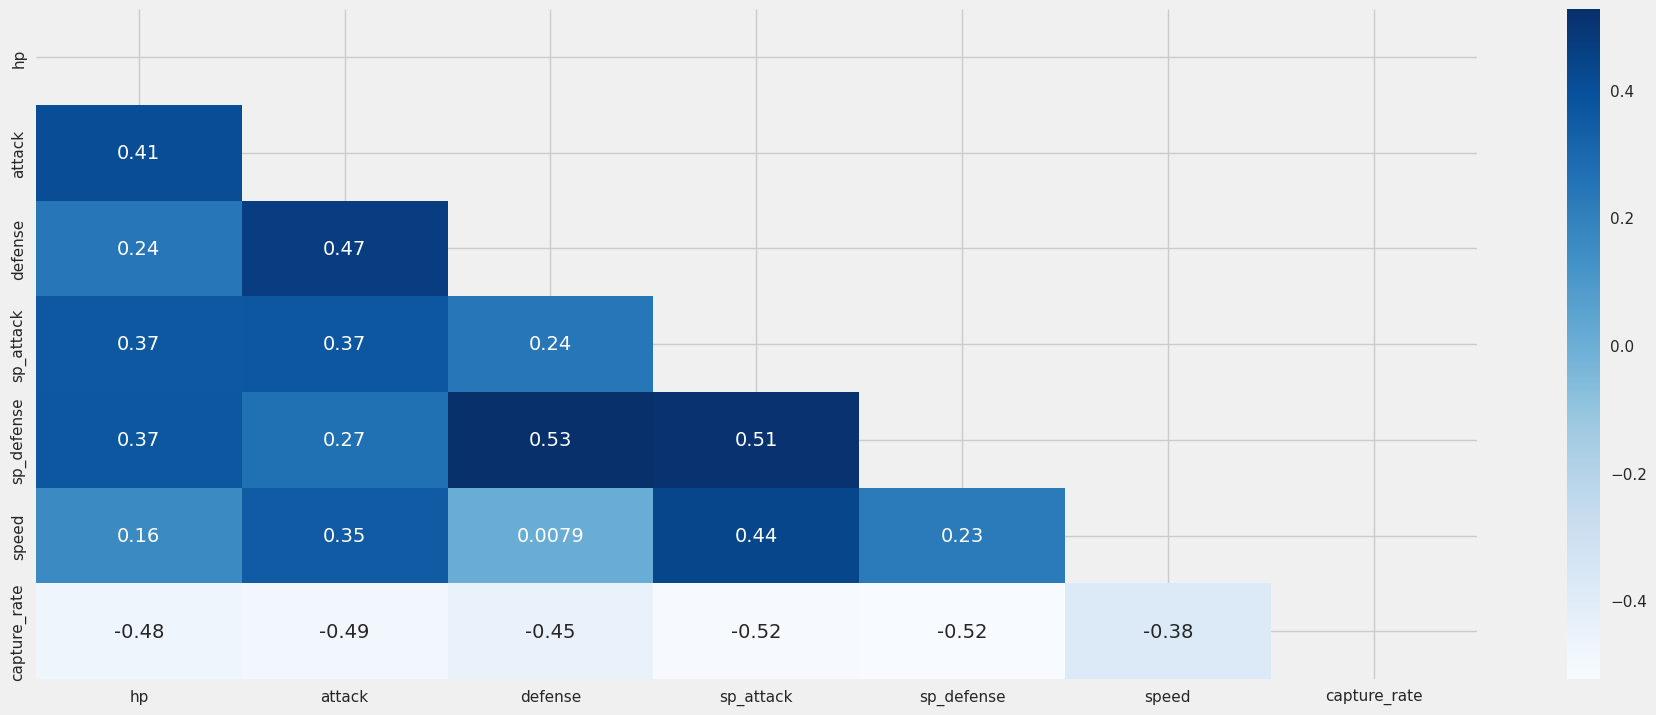

In [22]:
# heatmap correlation

corr = pokemon_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, mask = mask)
plt.show()

All stats features have positive correlation, and all of them have negative correlation. This is a good sign for effective clustering, since all features have moderate correlation to each other (with the exception of speed and defense).

The capture rate is inversely correlated to all other stats, meaning that the stronger the Pokémon (HP, attack, defense, special attack, special defense, and speed), the lower the capture rate. This aligns with game balance where more powerful Pokémon are harder to catch, adding challenge and strategy to the game. This ensures a balanced gameplay experience where powerful Pokémon require more effort to obtain.

## Outlier Handling

In [23]:
# function to check histogram, distribution plot, and boxplot

def check_plot(df, variable):
    # check distribution plot from variable in df.

    # figure size and title
    plt.figure(figsize=(16, 4))
    plt.suptitle(f' Outlier Analysis for {variable} feature', fontsize=16, y=1.05)

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # distribution (Q-Q) plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


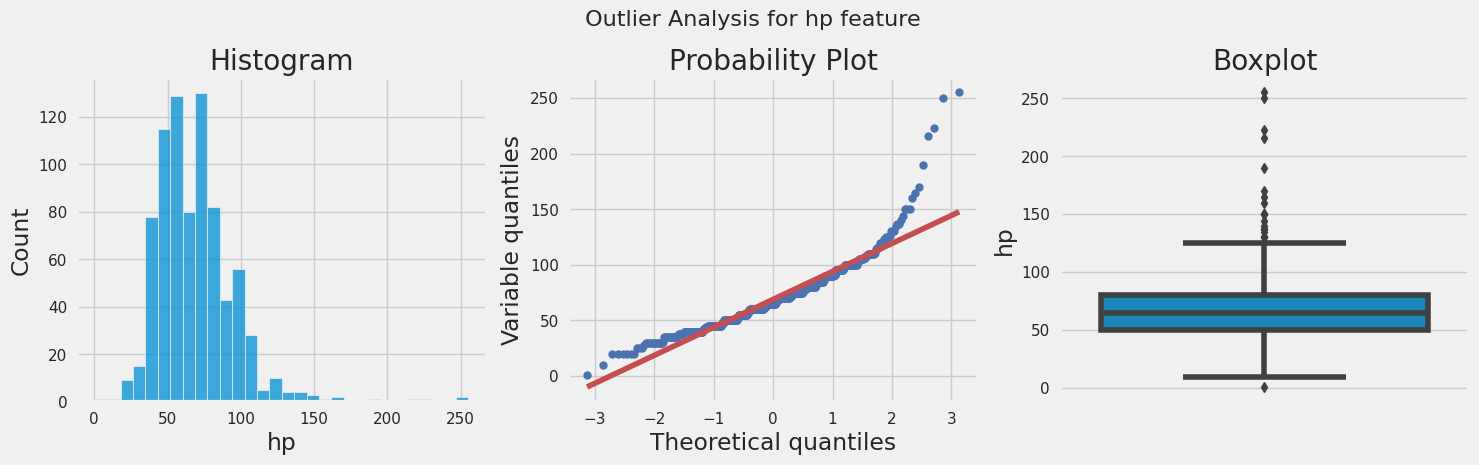

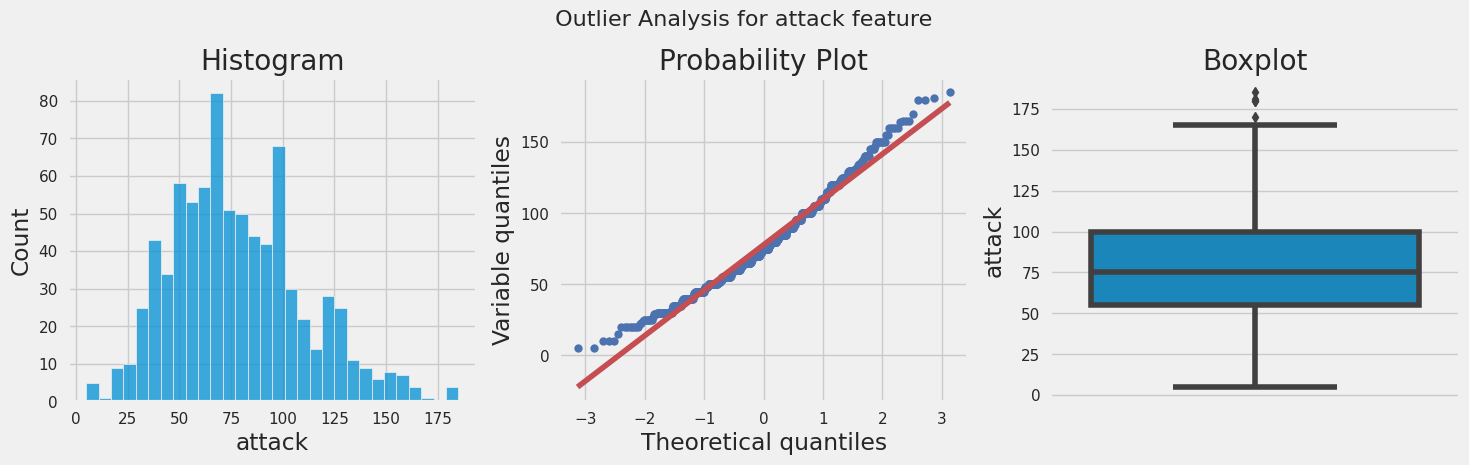

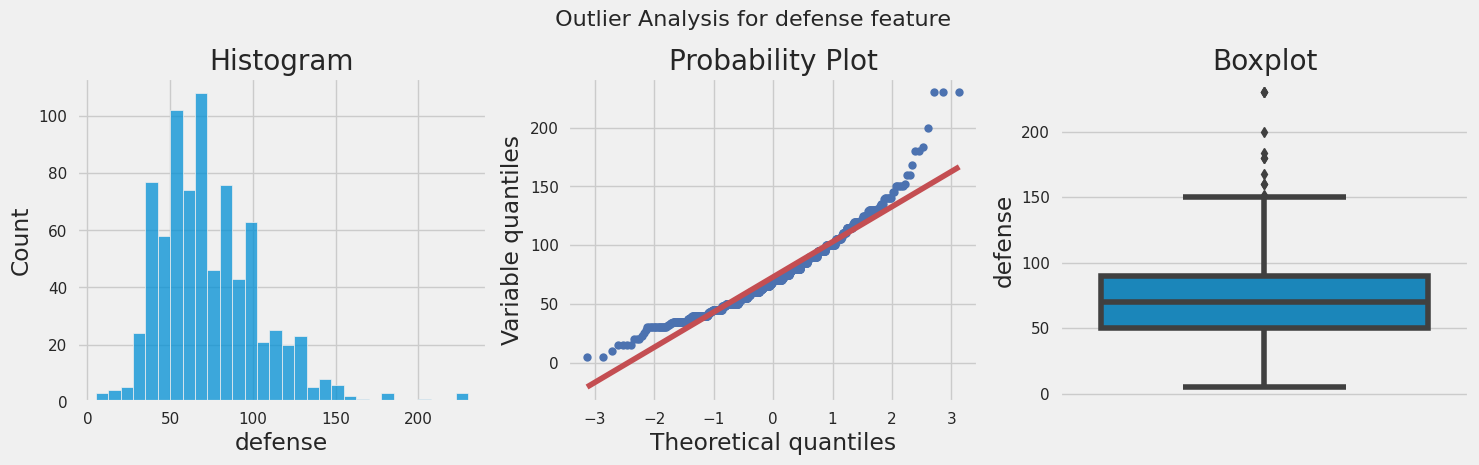

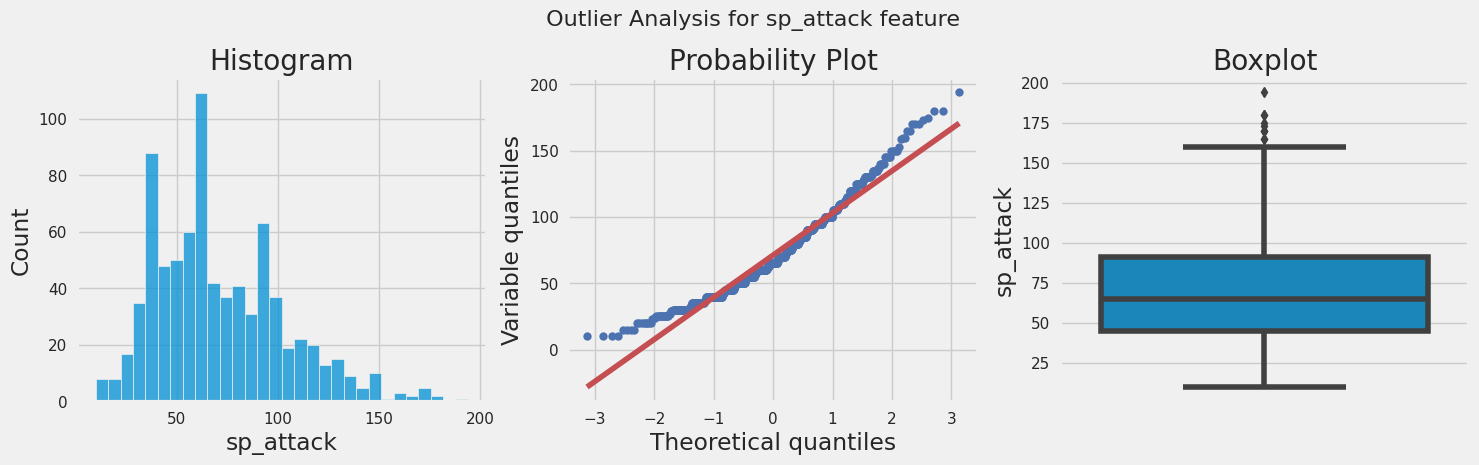

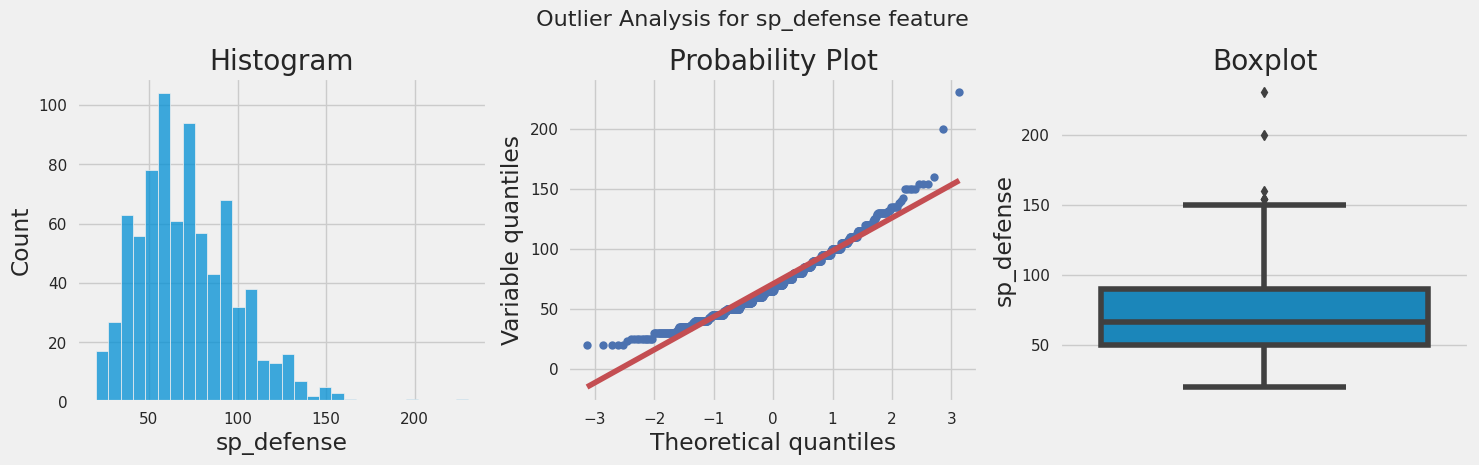

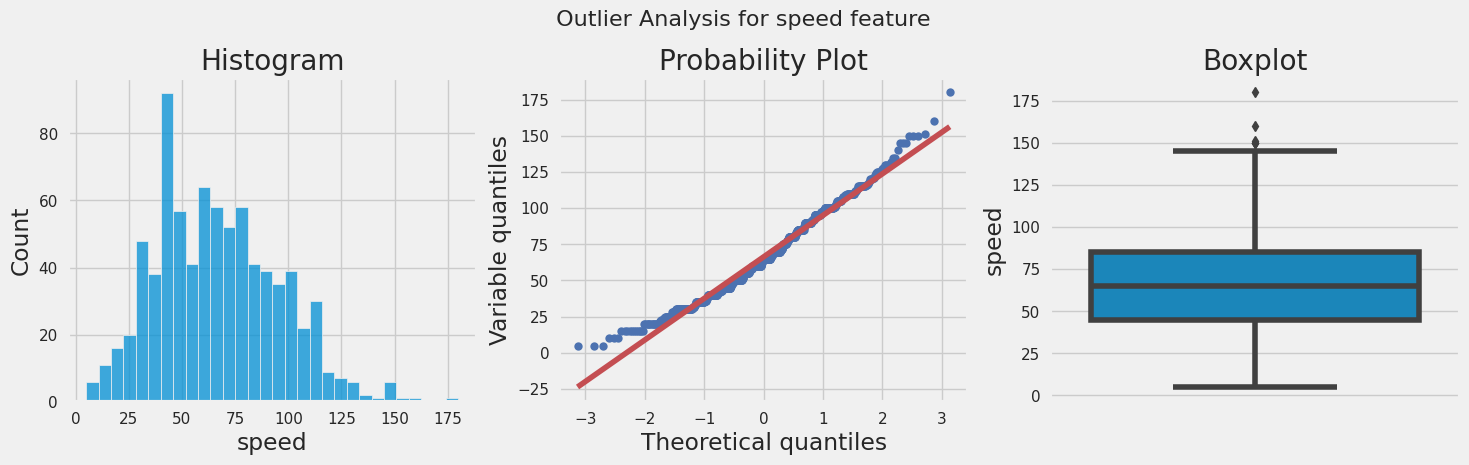

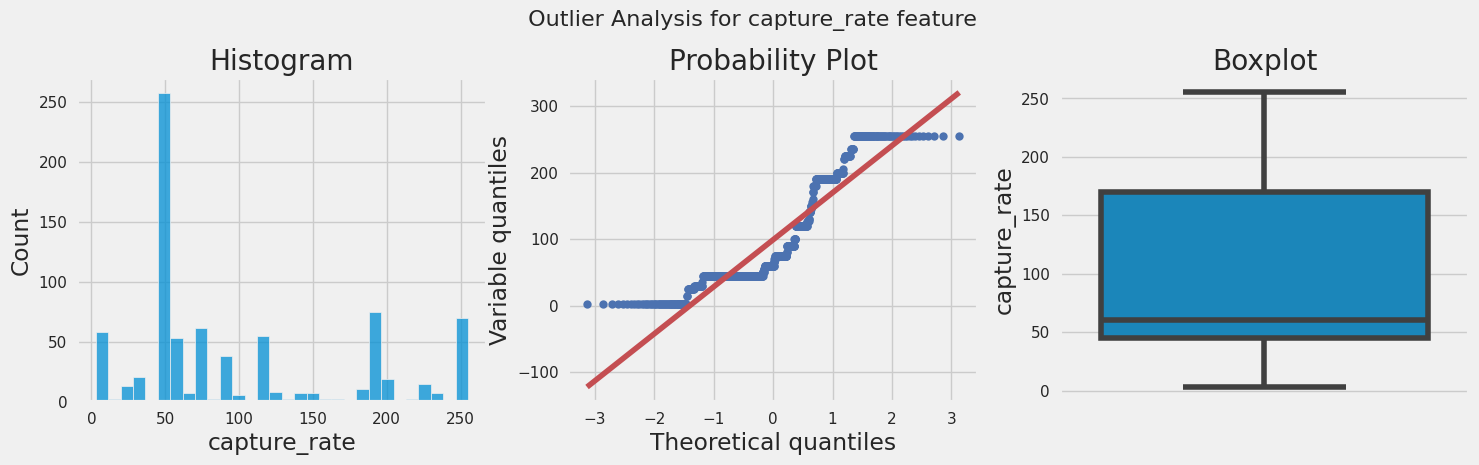

In [24]:
# plot looping for distribution analysis each features

for col in selected_features:
    check_plot(pokemon_df, col)

All features, except capture_rate, have outliers at their maximum values, especially hp, defense, and sp_defense that have extreme high outliers value. IQR will be checked for each features for outlier handling.

In [25]:
# function to check upper IQR and lower IQR from columns

def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [26]:
# dataframe to summarize IQR compared to minimum and maximum value for each columns

pd.DataFrame(data = {'Upper_IQR': [find_outlier_boundary(pokemon_df, col)[0] for col in selected_features],
                     'Maximum': [pokemon_df[col].max() for col in selected_features],
                     'Lower_IQR': [find_outlier_boundary(pokemon_df, col)[1]  for col in selected_features],
                     'Minimum': [pokemon_df[col].min() for col in selected_features]},
             index = [col for col in selected_features])

,Upper_IQR,Maximum,Lower_IQR,Minimum
hp,125.0,255,5.0,1
attack,167.5,185,-12.5,5
defense,150.0,230,-10.0,5
sp_attack,160.0,194,-24.0,10
sp_defense,150.0,230,-10.0,20
speed,145.0,180,-15.0,5
capture_rate,357.5,255,-142.5,3


All features, except hp, have negative values in lower IQR. However, all features, except hp, have their minimum value greater than its lower IQR. Hence, only hp (with 1 hp value as minimum) will be changed to its lower IQR (5). The other features are still in their IQR.

However, all features, except capture_rate, have their maximum values higher than its upper IQR. Hence, the values that is higher than upper IQR will be replaced to its upper IQR, so the features will be more likely to have normal distribution for clustering.

In [27]:
# replace the outliers with upper and lower IQR

for col in selected_features:
    Population_upper_limit, Population_lower_limit = find_outlier_boundary(pokemon_df, col)

    pokemon_df[col]= np.where(pokemon_df[col] > Population_upper_limit, Population_upper_limit,
                       np.where(pokemon_df[col] < Population_lower_limit, Population_lower_limit, pokemon_df[col]))

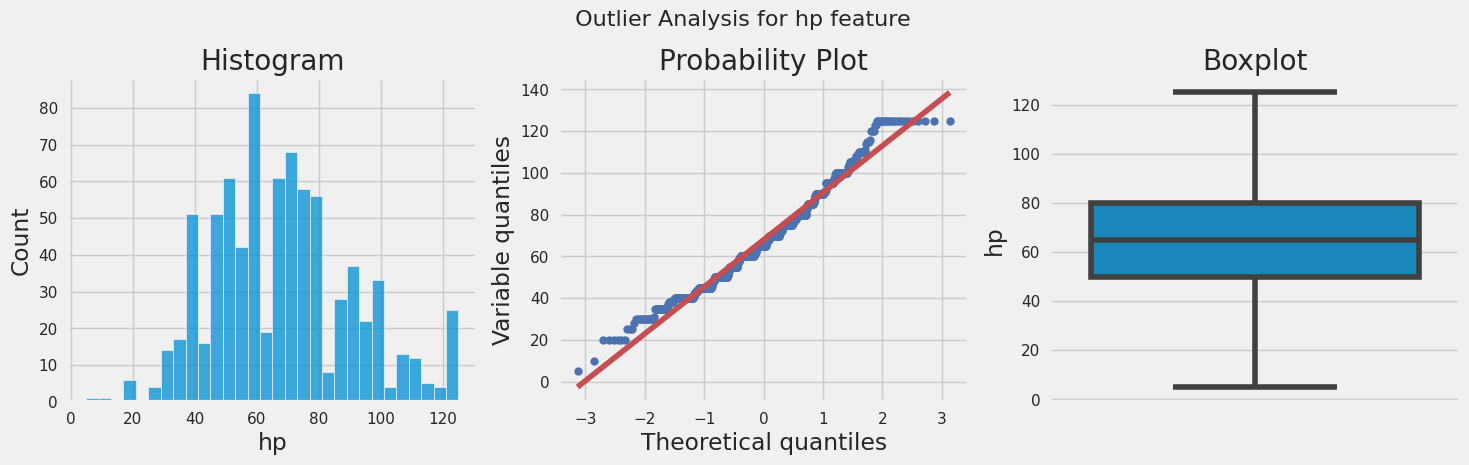

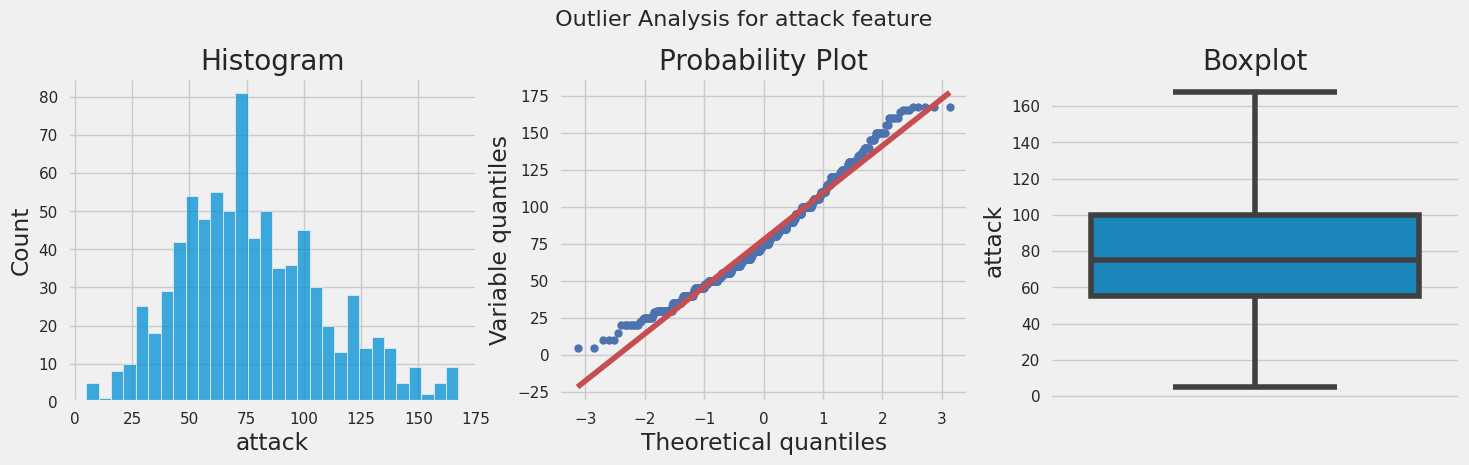

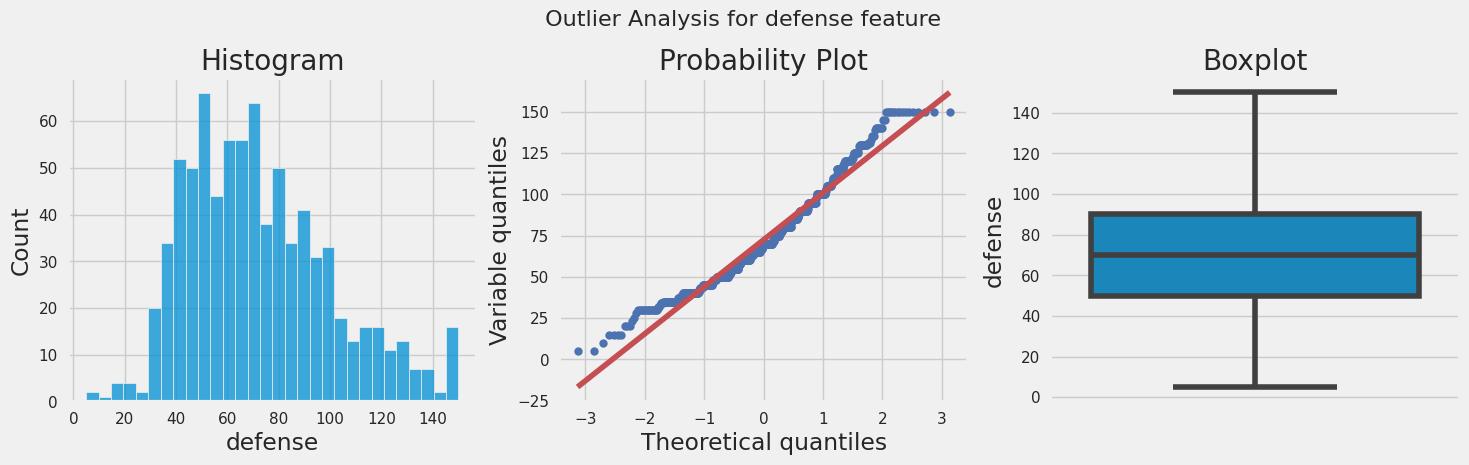

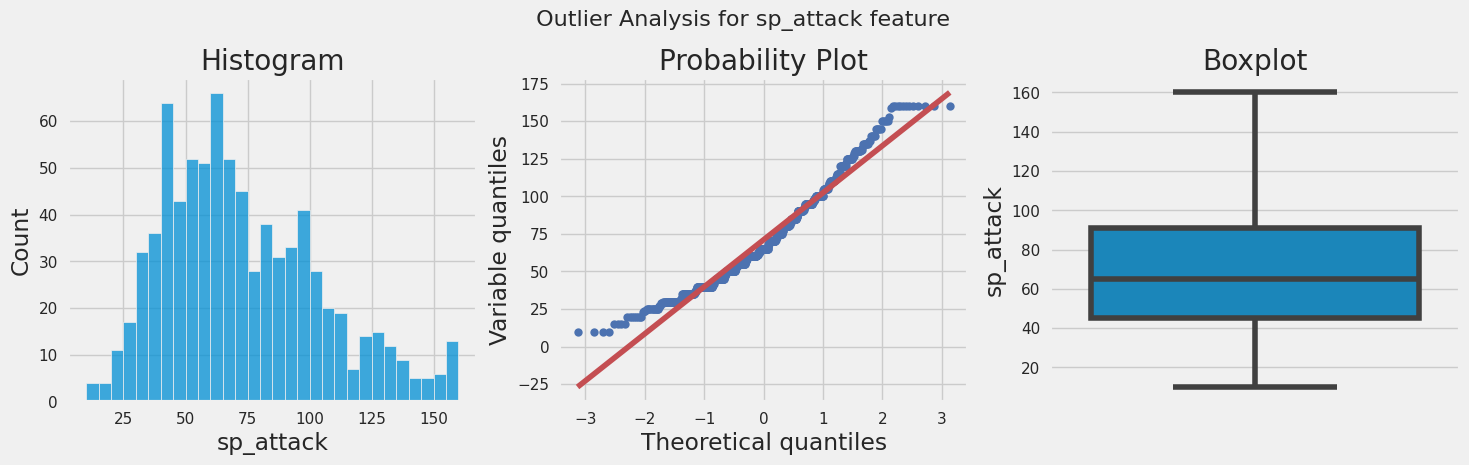

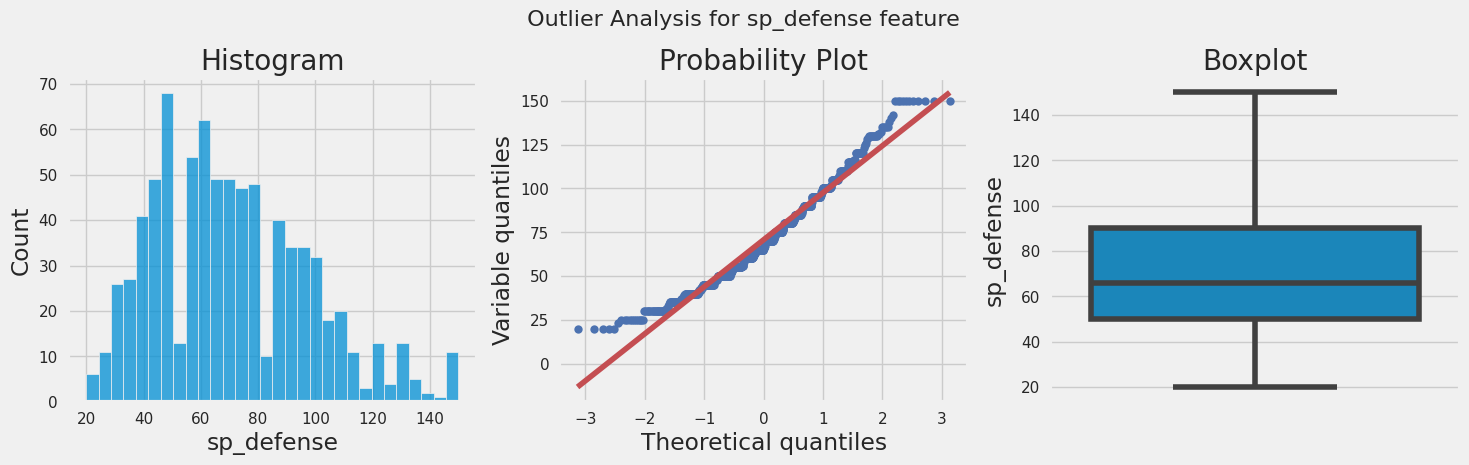

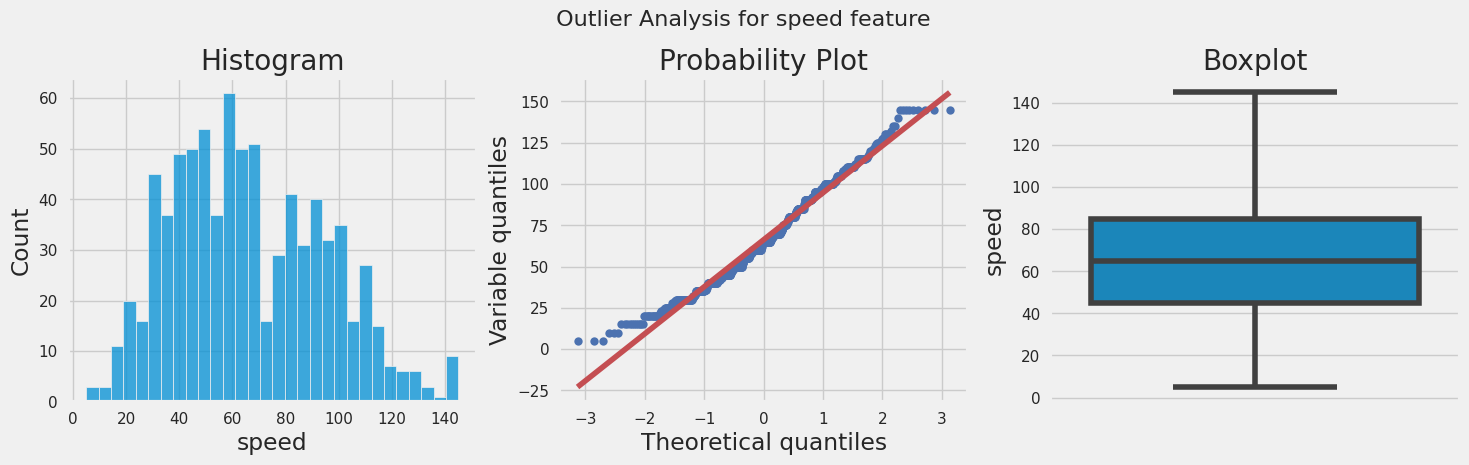

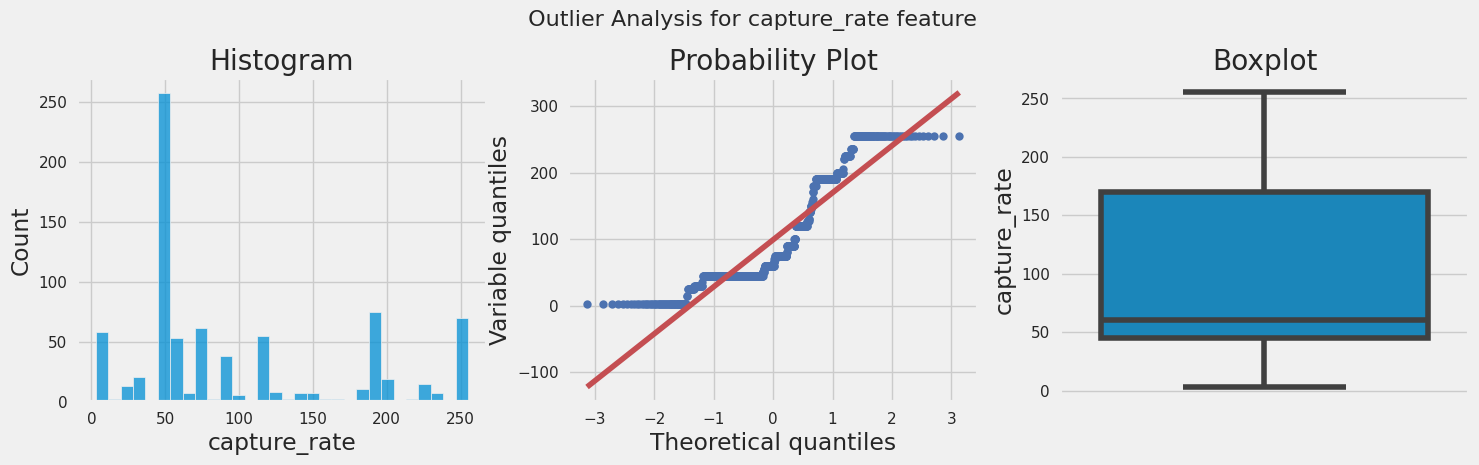

In [28]:
# plot looping for distribution analysis after outlier treatment in features

for col in selected_features:
    check_plot(pokemon_df, col)

After performing outliers treatment by IQR methods, all features already free from outliers which clearly shown in the boxplots. All features distribution tend to have balanced (normal) distribution after reassigning their maximum values to their upper IQR, which depicted in histogram, probability plot, and boxplot.

K-means clustering algorithm will more likely to perform better after outlier handling, since the algorithm is heavily affected by mean of distance from each data point to its centroid.

## Feature Scaling

In [29]:
# feature standardization to ensure each features have similar scales

scaler = StandardScaler()
scaled_features = scaler.fit_transform(pokemon_df)

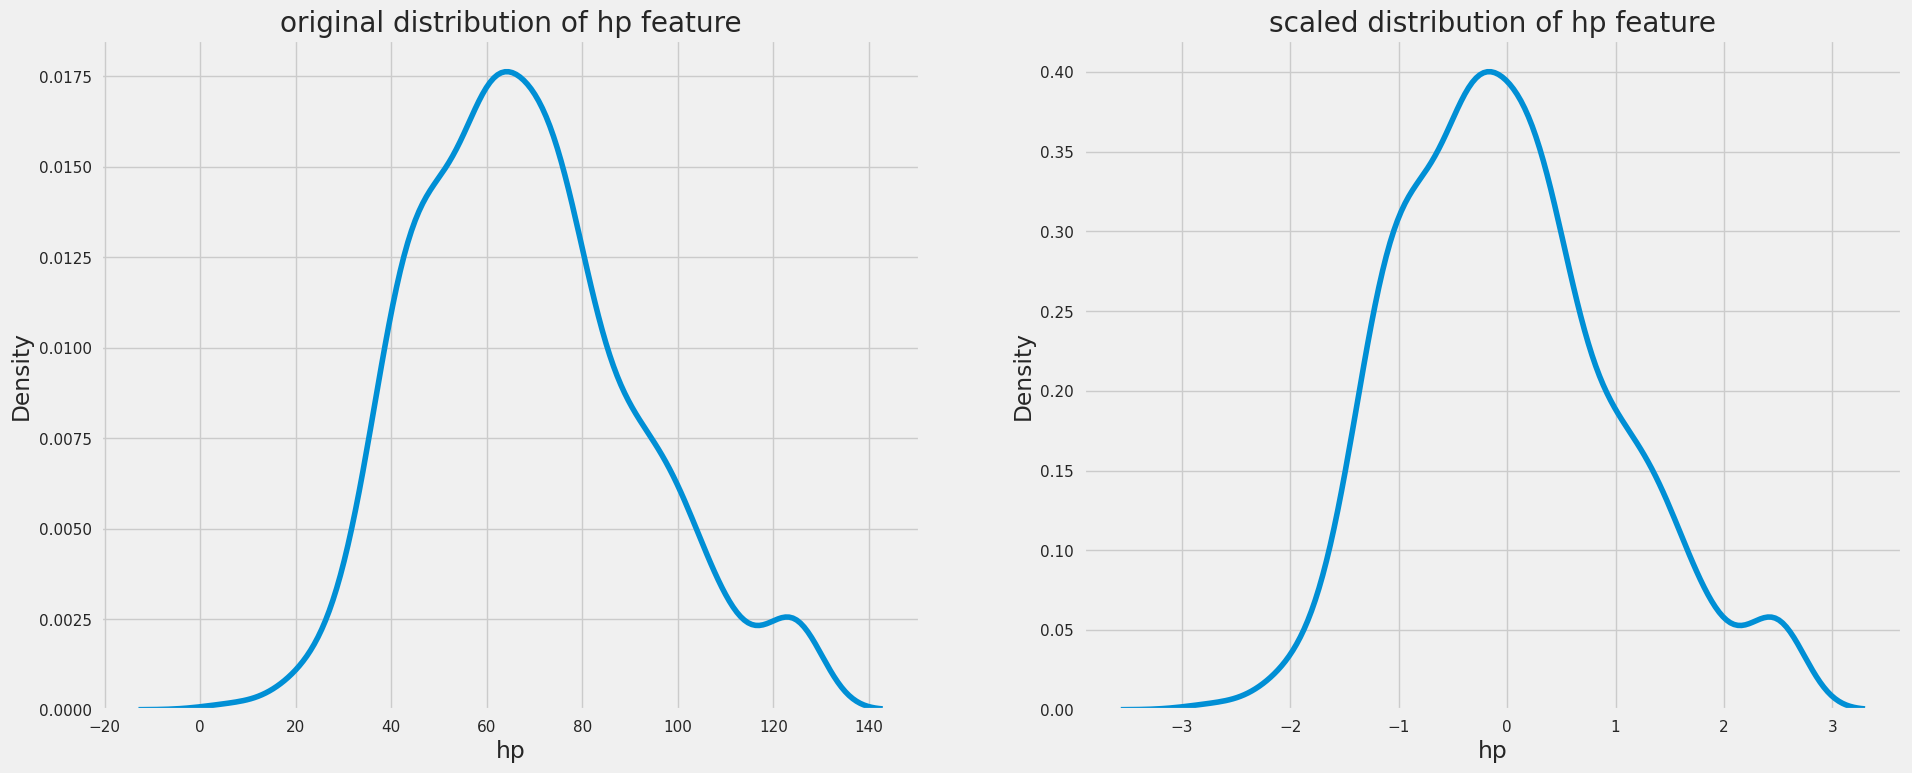

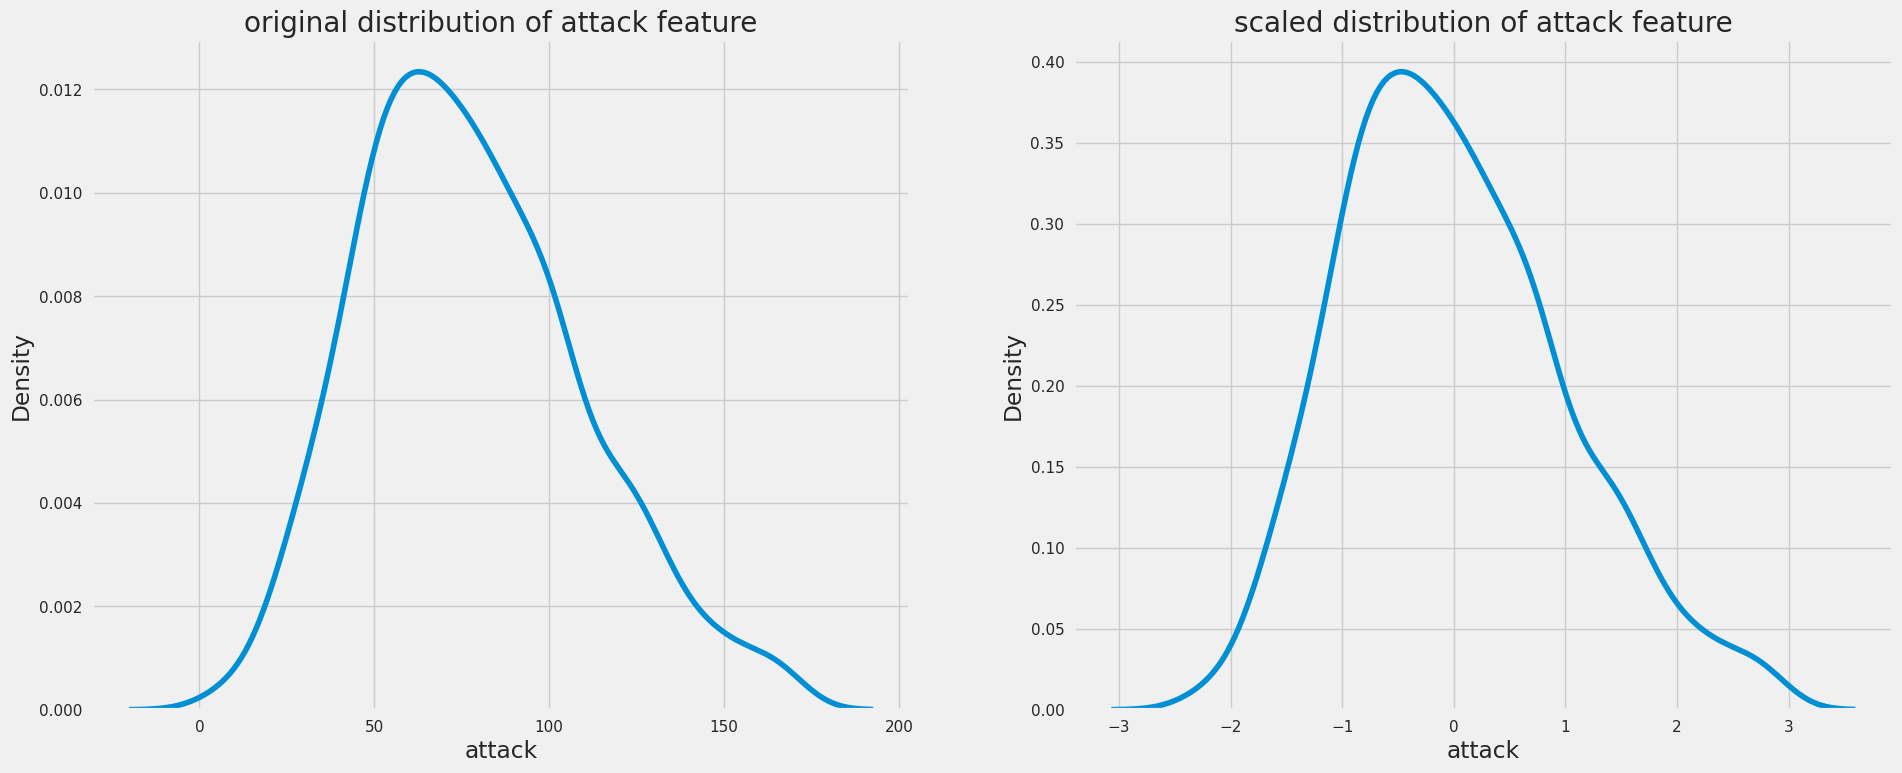

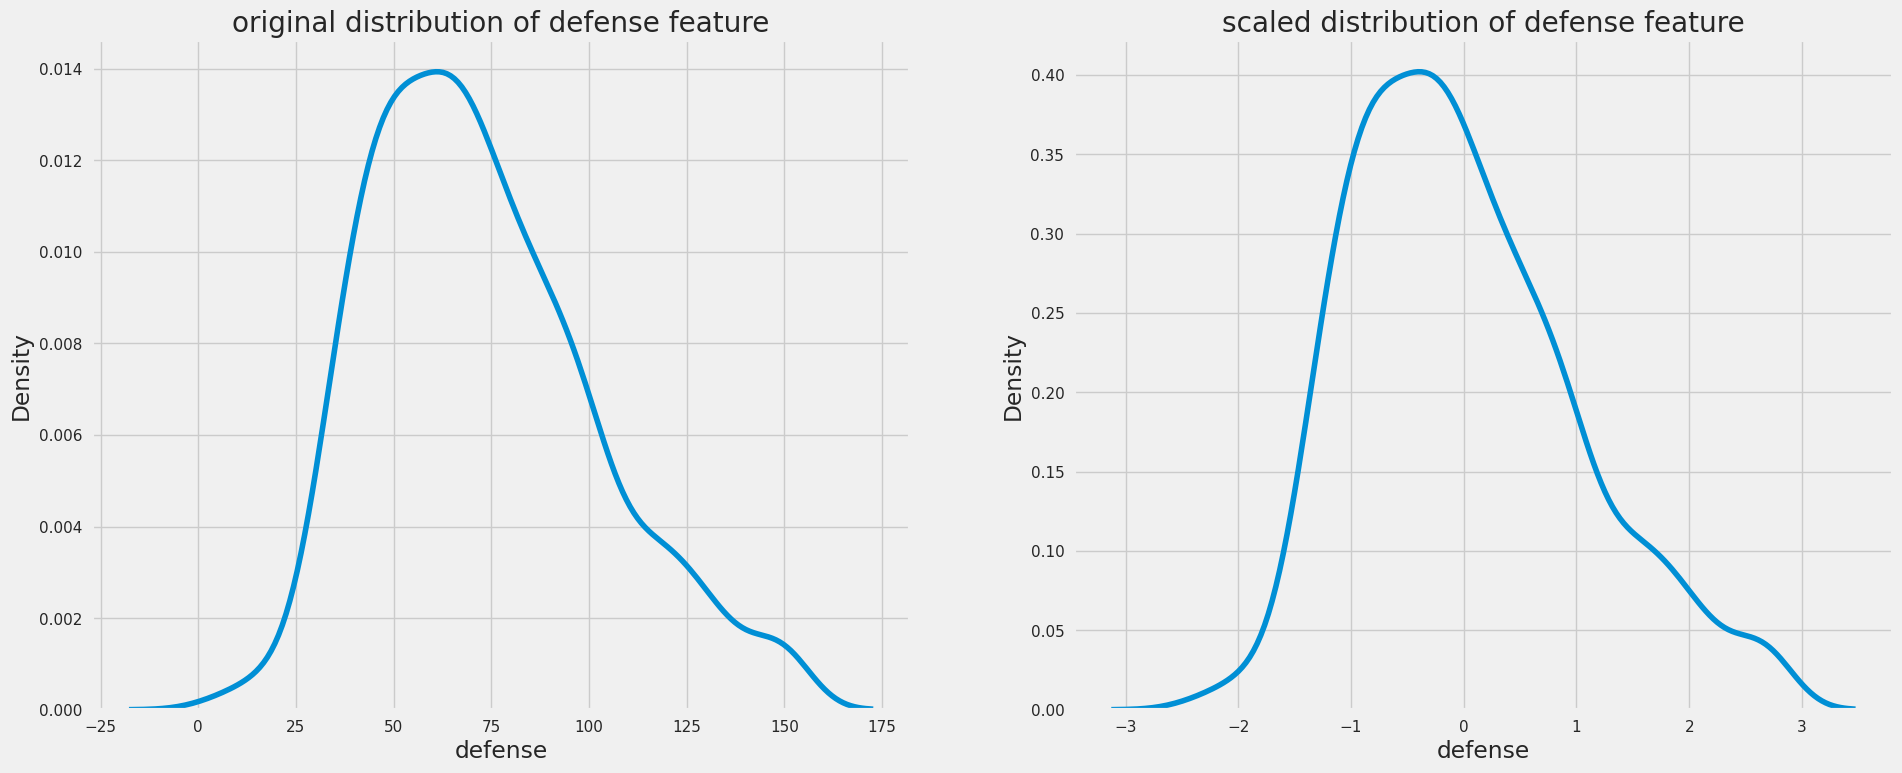

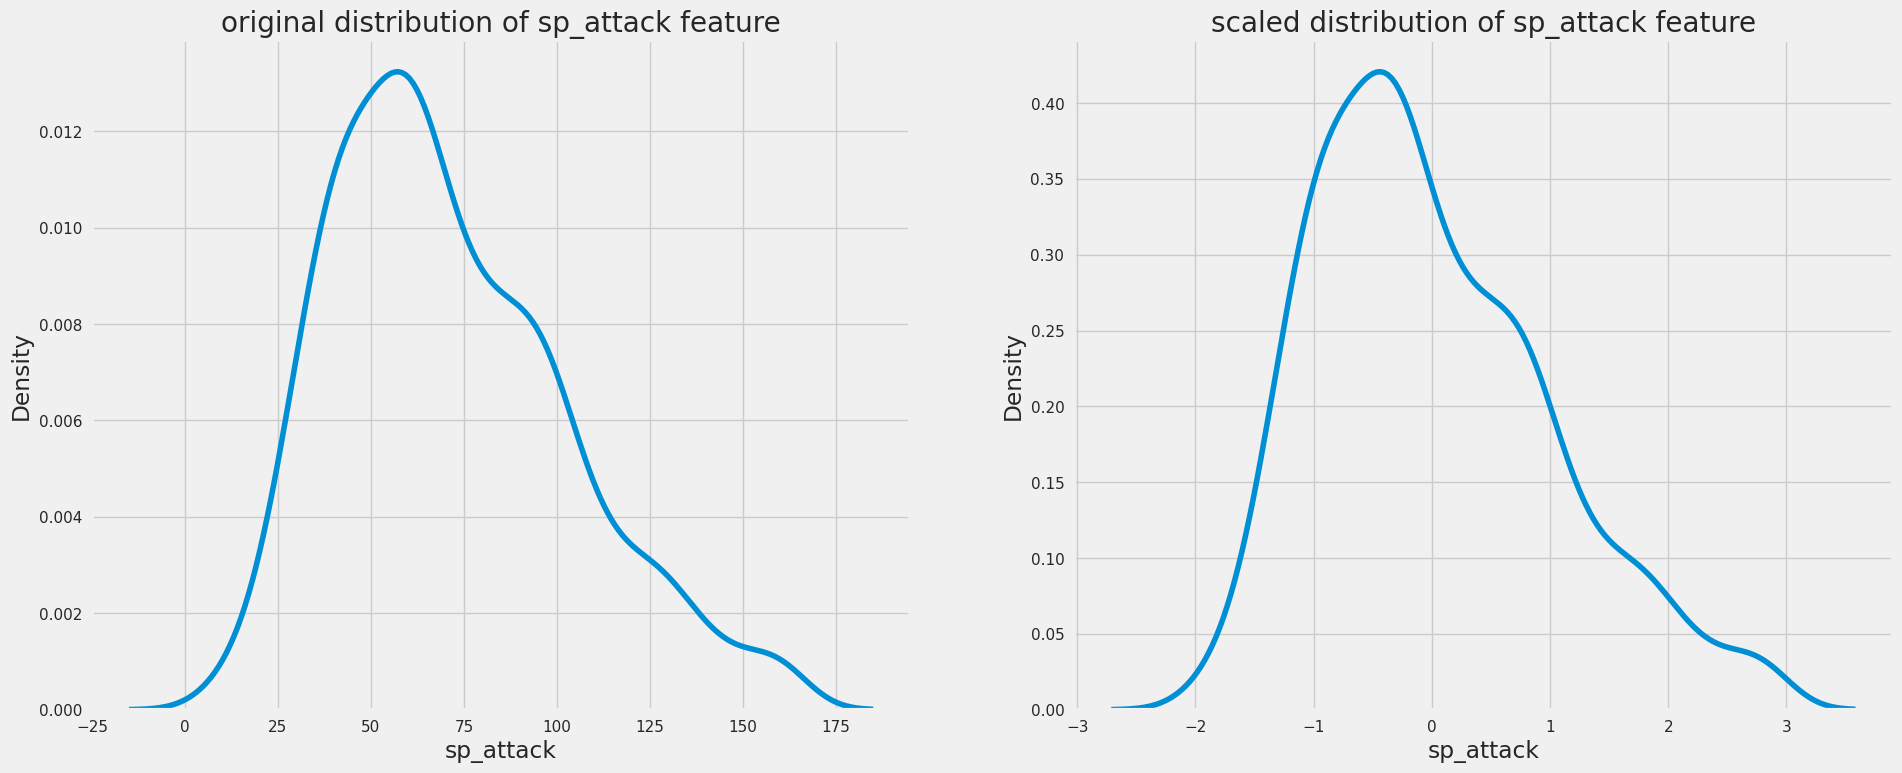

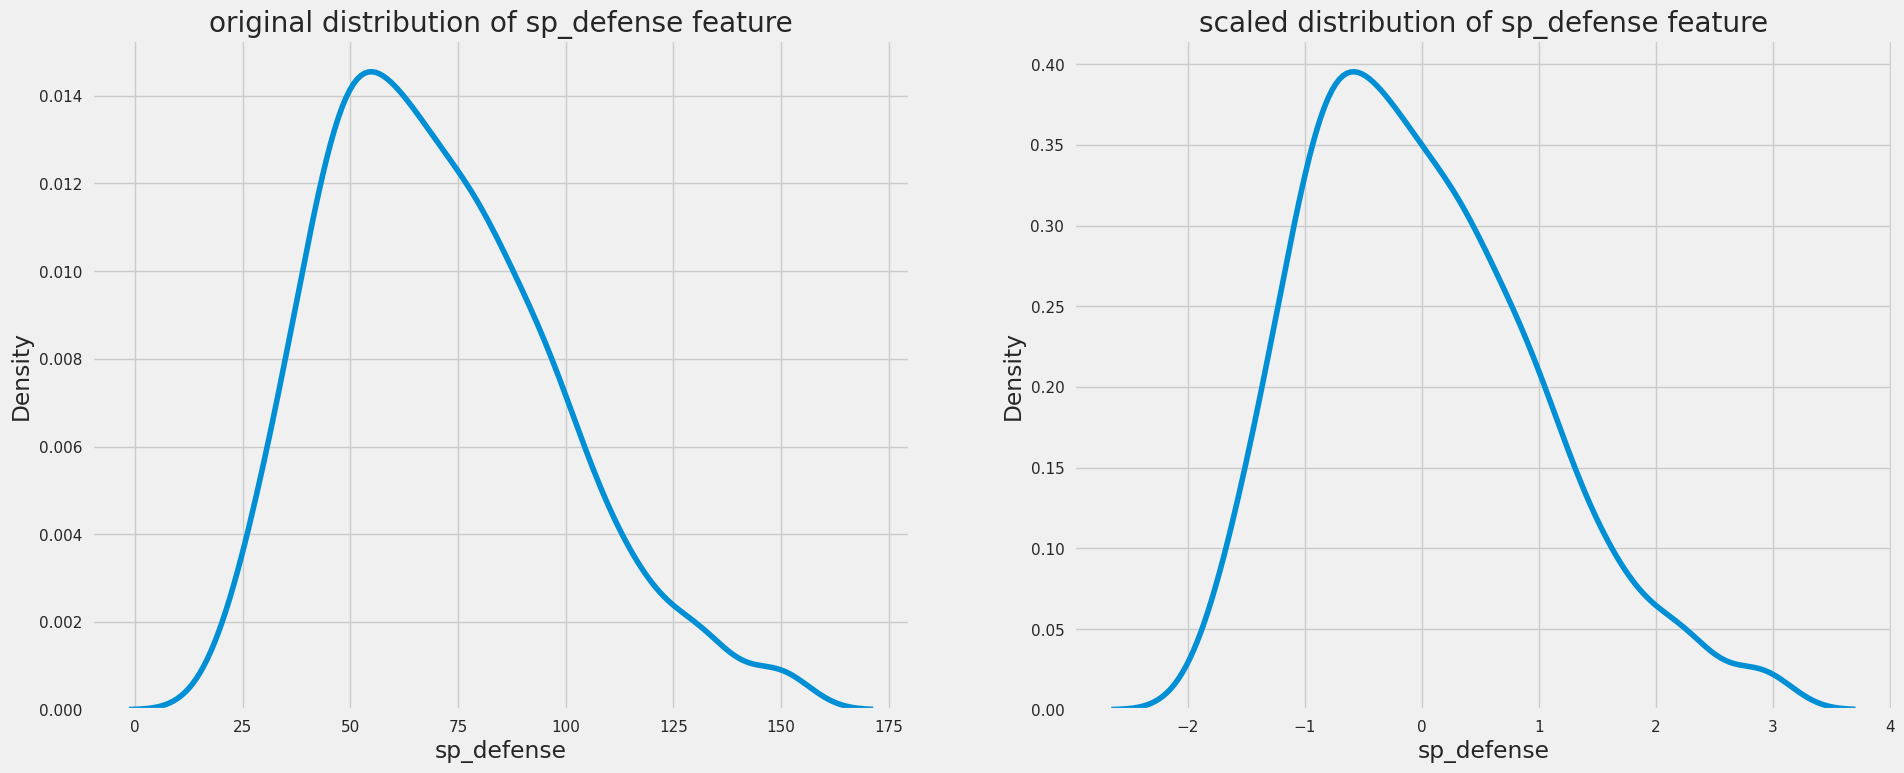

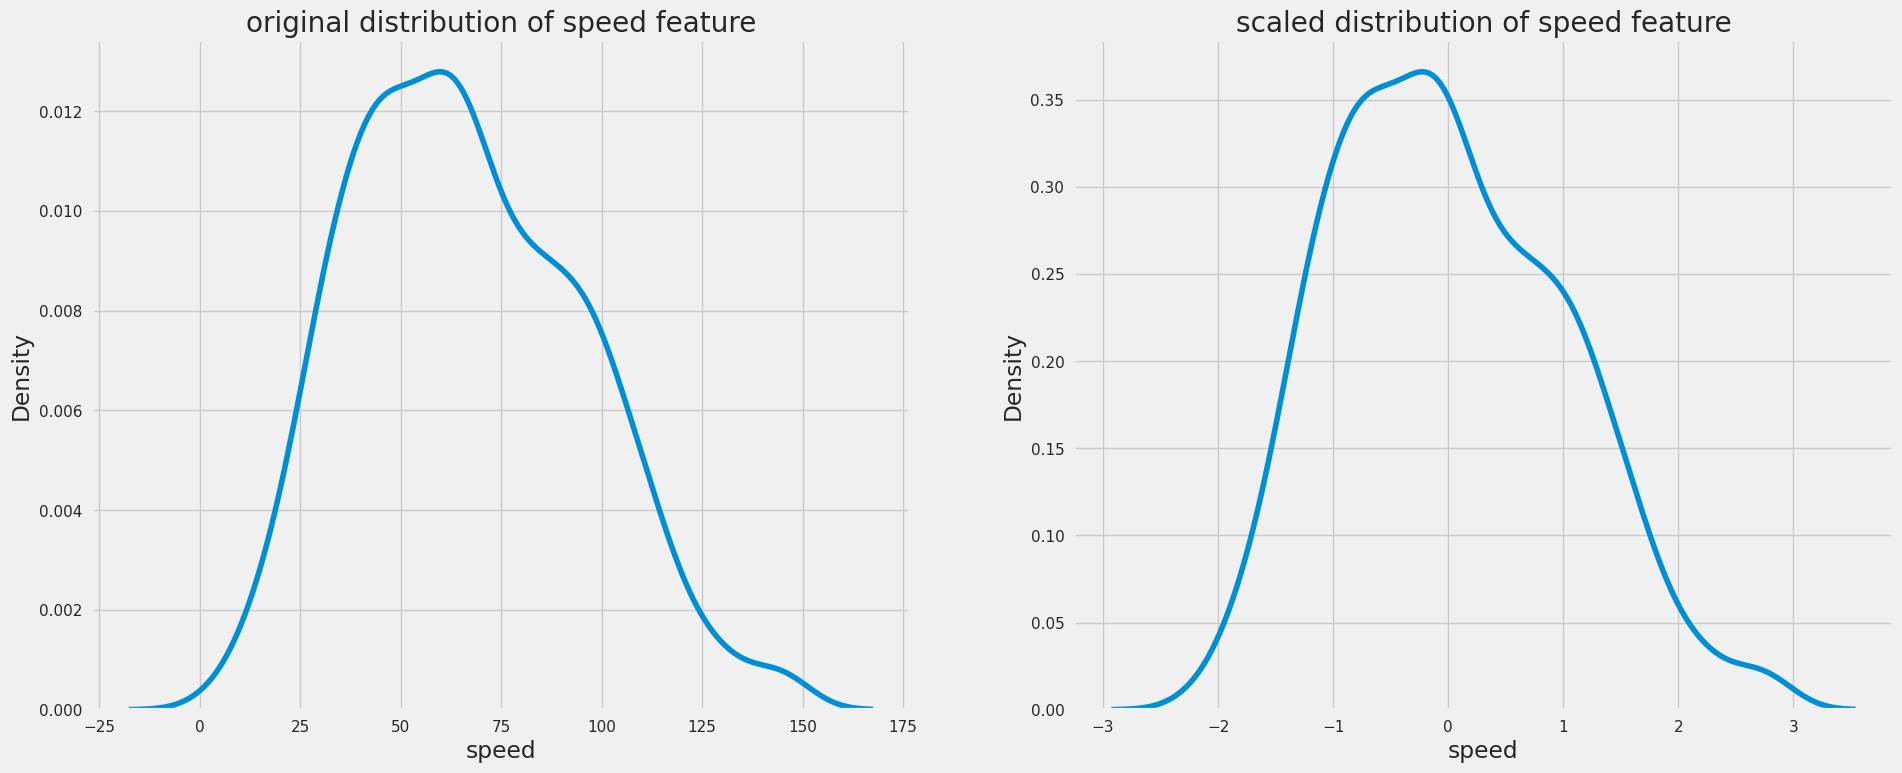

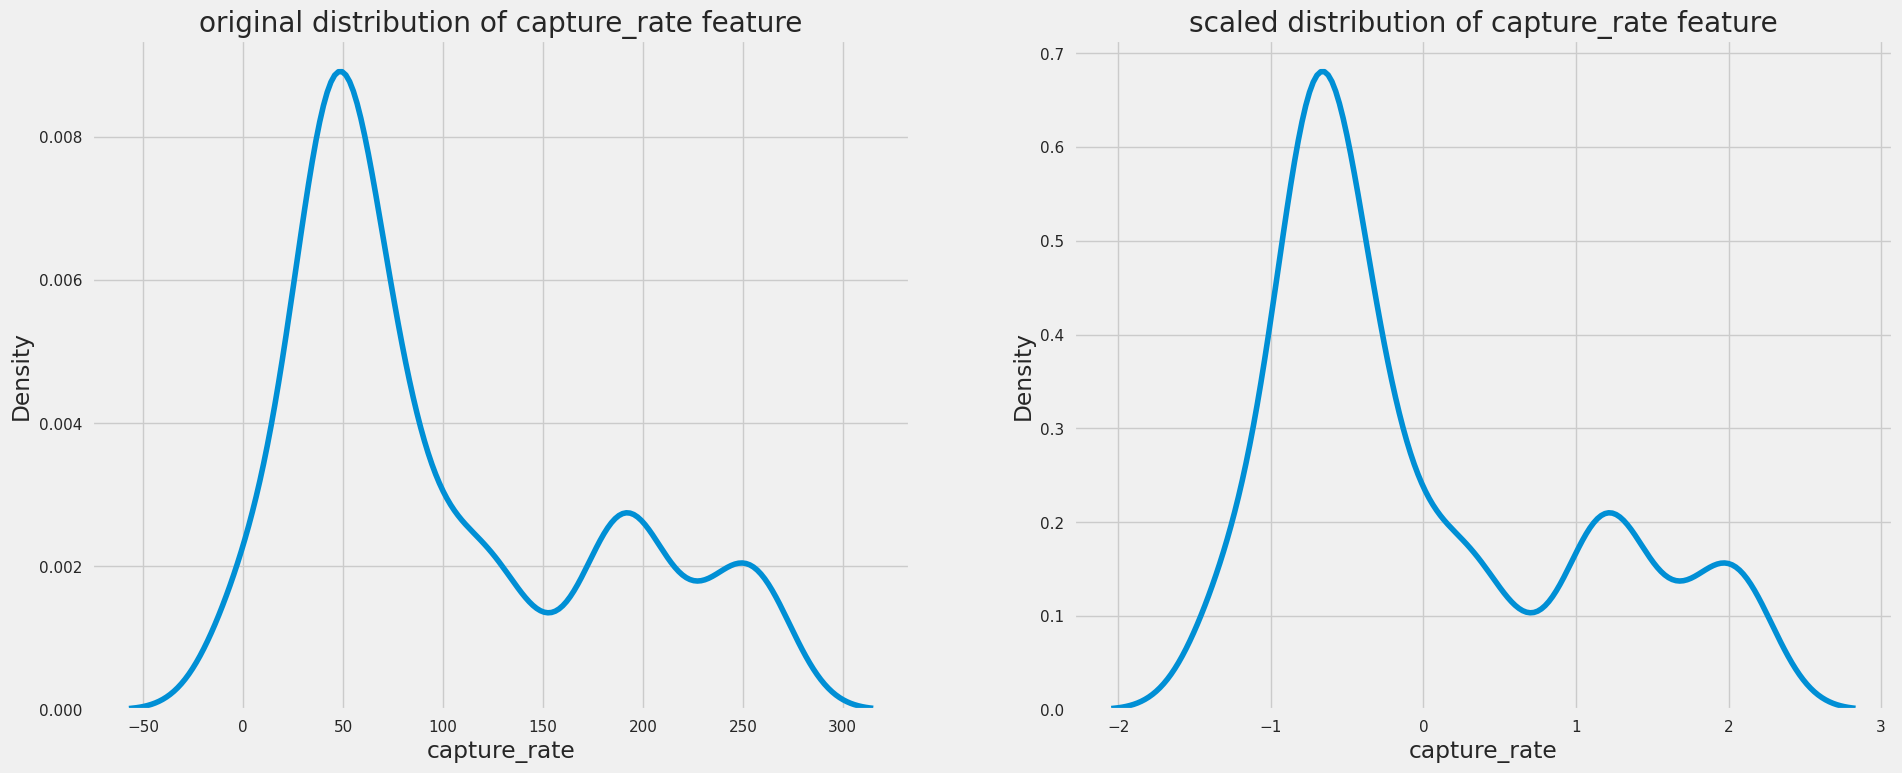

In [30]:
# comparing each features before and after feature scaling

scaled_features = pd.DataFrame(scaled_features,columns= selected_features)

for col in selected_features:
    plt.subplot(121)
    sns.kdeplot(pokemon_df[col])
    plt.title(f'original distribution of {col} feature')

    plt.subplot(122)
    sns.kdeplot(scaled_features[col])
    plt.title(f'scaled distribution of {col} feature')
    plt.show()

All features have been scaled to have normal distribution with similar range. Hence the features will not overpowering each other during clustering process, as they have similar scales.

## Evaluate optimal cluster number by Elbow method, Silhoutte Score, and Gap Statistic method

To obtain the optimal number of clusters, we will do evaluation with Elbow method, Silhoutte Score, and Gap Statistic method.

### Elbow Method

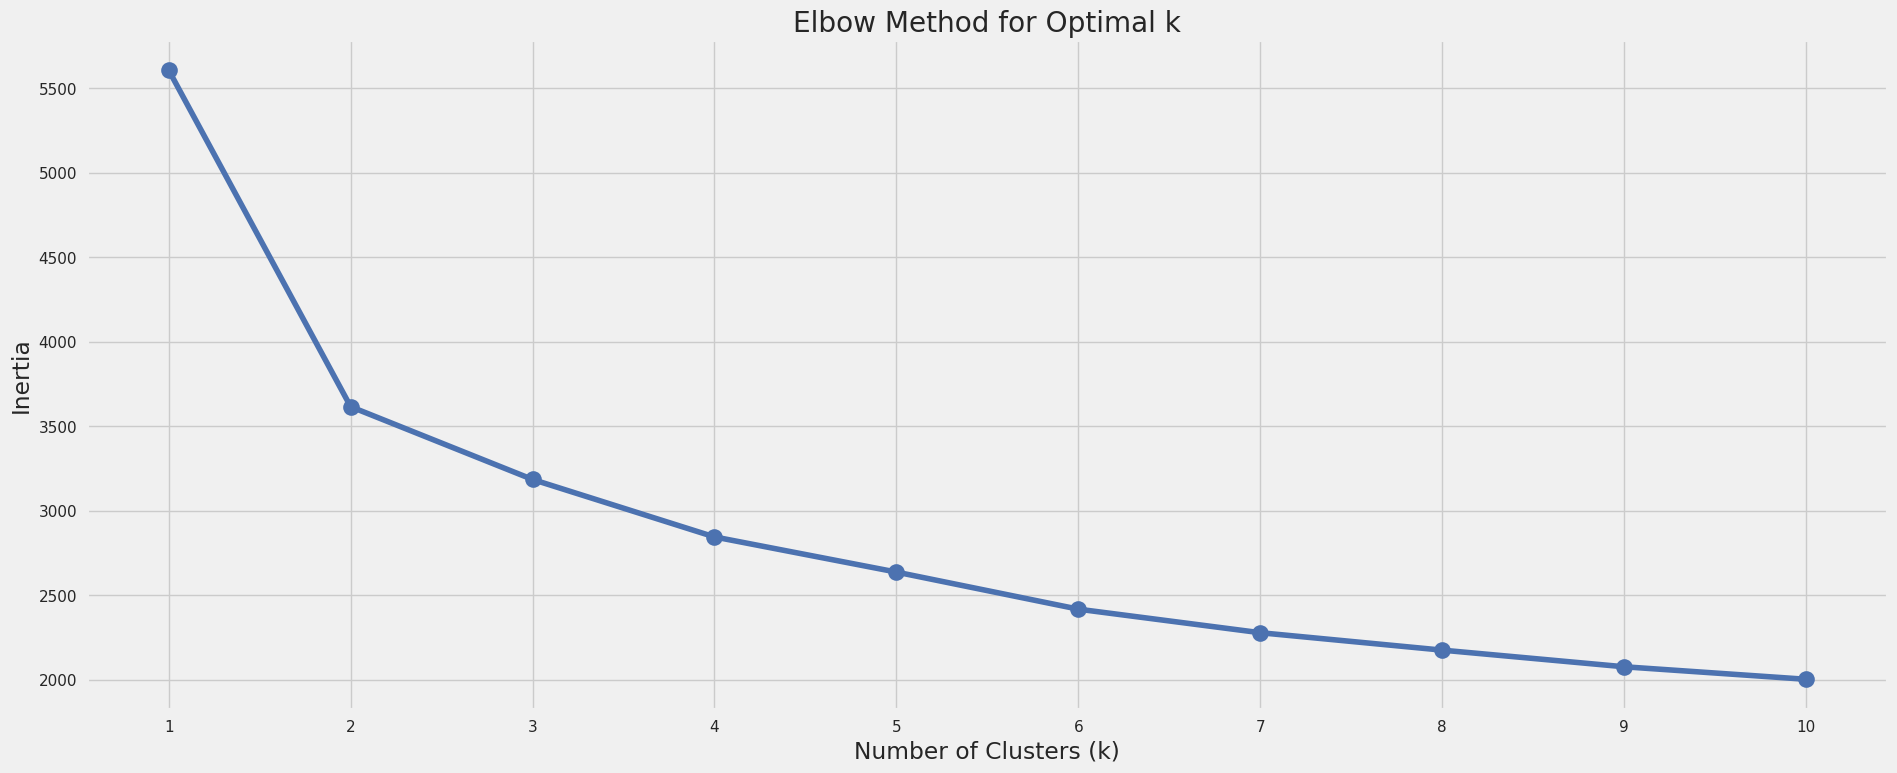

In [31]:
# Elbow Method for optimal k (cluster number)

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve

plt.plot(range(1, 11), inertia, marker='o', markersize= 12, linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [32]:
# input elbow analysis results to dataframe

inertia_decrease = pd.Series(inertia) - pd.Series(inertia).shift(-1) / pd.Series(inertia) * 100 #untuk melihat pengurangan inertia

# Calculate percentage decrease

inertia_values = pd.Series(inertia)
percentage_decrease = ((inertia_values.shift(1) - inertia_values) / inertia_values.shift(1)) * 100

# present elbow analysis results in dataframe

inertia_table = pd.concat([inertia_decrease, percentage_decrease], axis=1)
inertia_table.reset_index(inplace=True)
inertia_table.columns = ['Cluster Number', 'Inertia Decrease', 'Percentage Inertia Decrease (%)']
inertia_table['Cluster Number'] += 1

inertia_table

,Cluster Number,Inertia Decrease,Percentage Inertia Decrease (%)
0,1,5542.502275,NaN
1,2,3528.292851,35.502275
2,3,3096.514105,11.905386
3,4,2753.175533,10.671530
4,5,2546.119298,7.311117
5,6,2324.112341,8.319349
6,7,2183.573465,5.760164
7,8,2080.506979,4.522350
8,9,1981.138031,4.522523
9,10,NaN,3.562981


Based on elbow analysis depicted in graph and table, after k = 4, there is no significant decrease in inertia (below 10% of inertia decrease after cluster number = 4). Hence, the optimal number of cluster from elbow analysis is 4.

### Silhouette Score Method

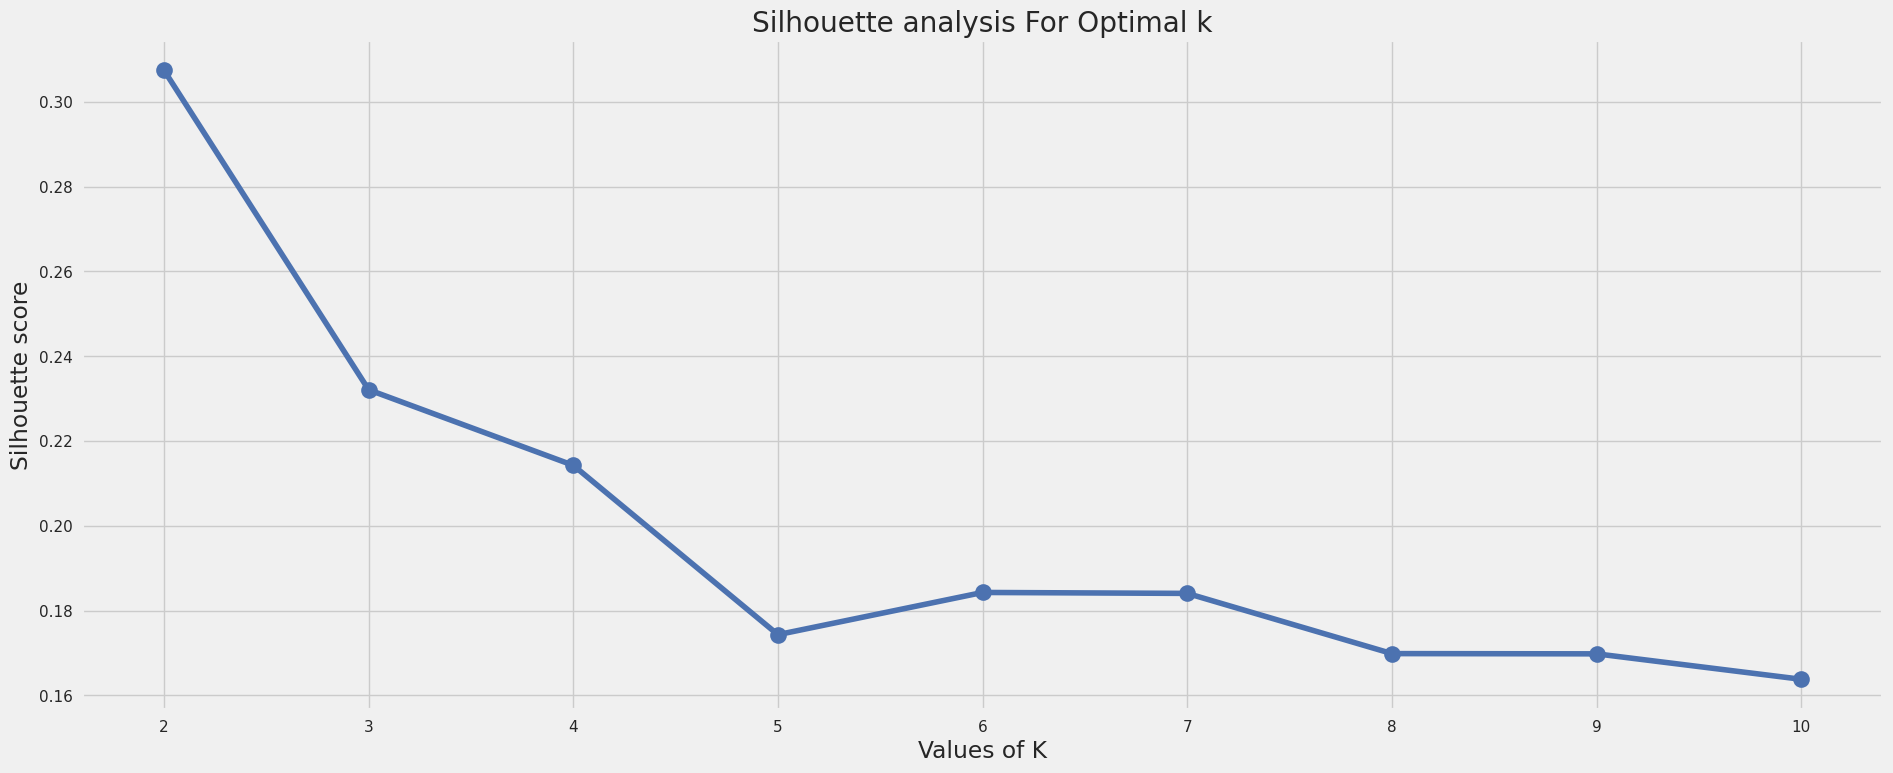

Optimal number of clusters: 2 with silhouette score average 0.307


In [33]:
# range of cluster number for experiment

min_clusters = 2
max_clusters = 10

# Calculate silhouette score for different numbers of clusters

silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters,  init='k-means++', max_iter=300, n_init=10, random_state = 42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + min_clusters

range_n_clusters = range(2,11)

plt.plot(range_n_clusters, silhouette_scores, marker='o', markersize= 12, linestyle='-', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

print(f"Optimal number of clusters: {optimal_num_clusters} with silhouette score average {round(max(silhouette_scores),3)}")

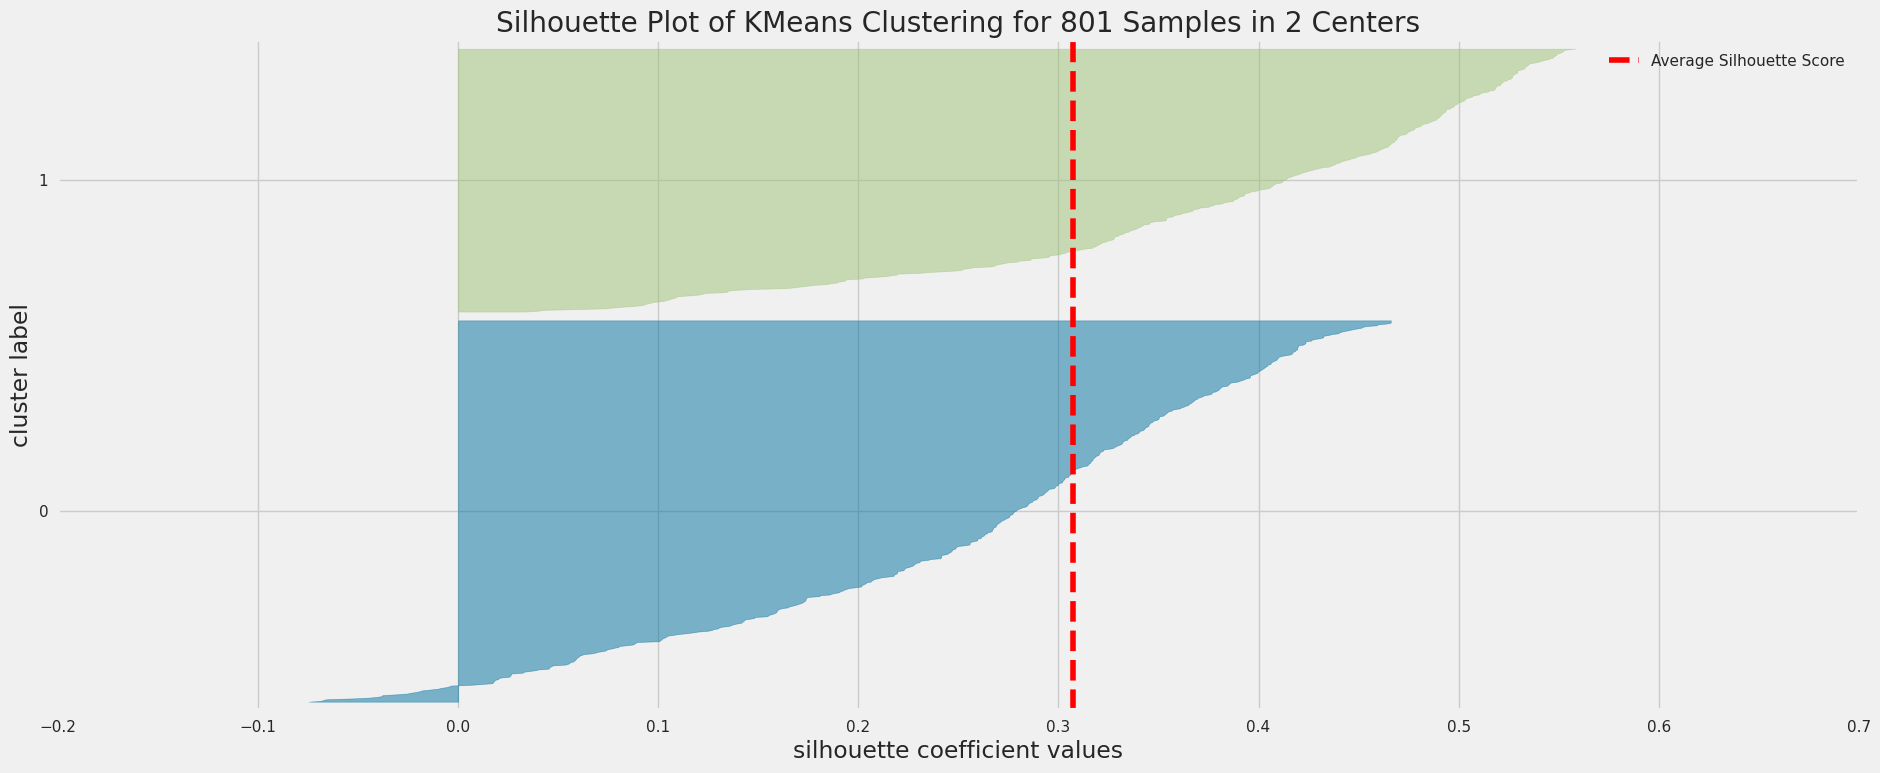

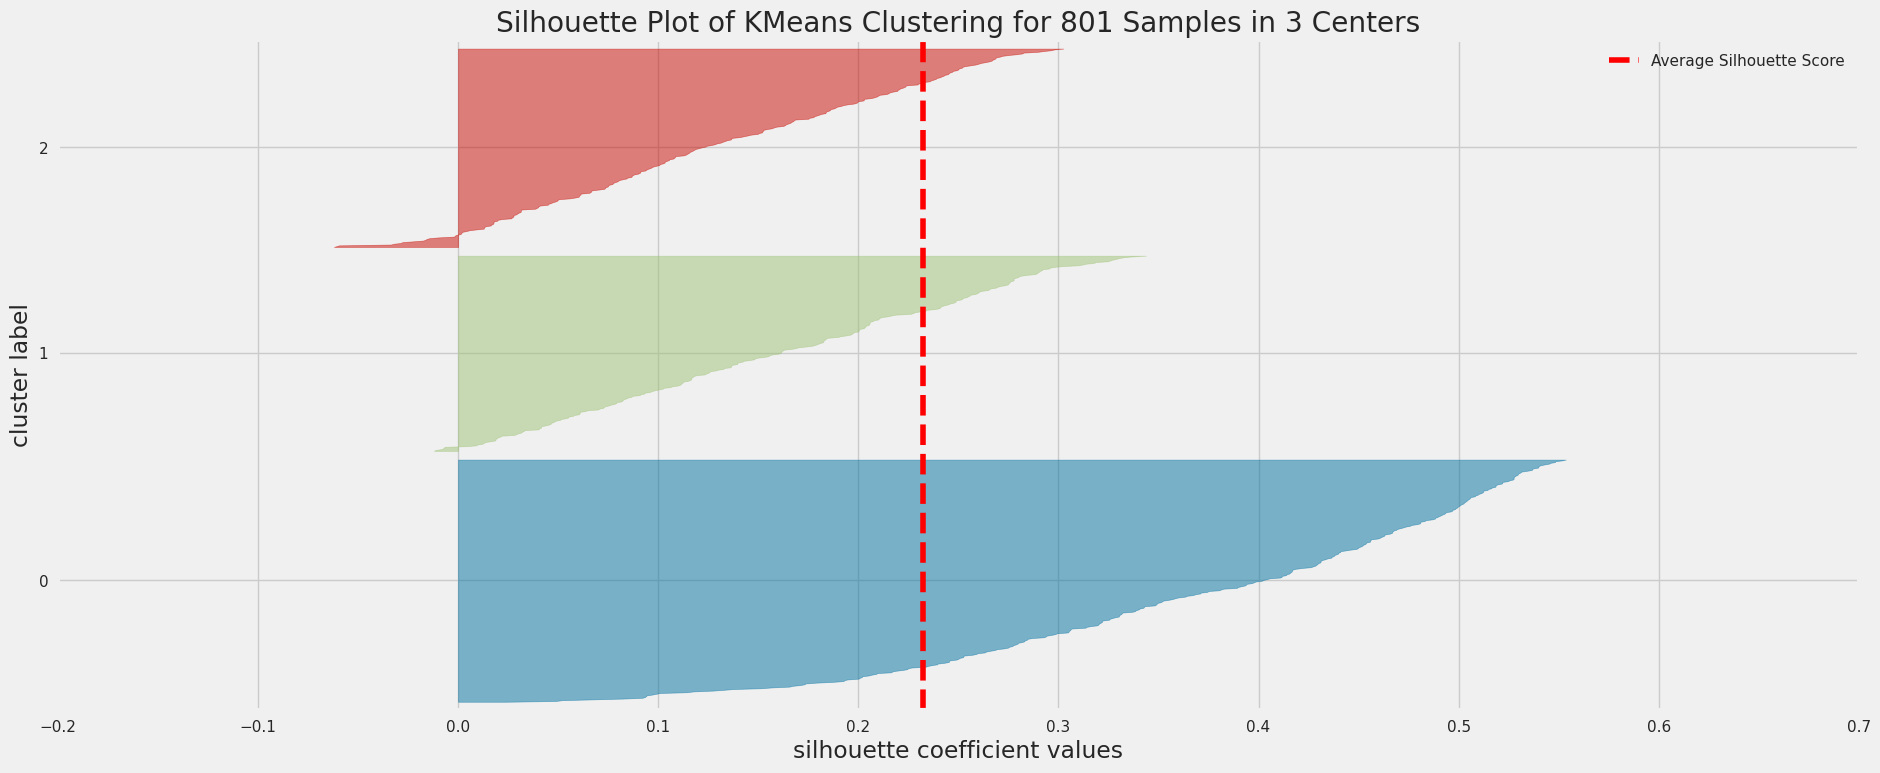

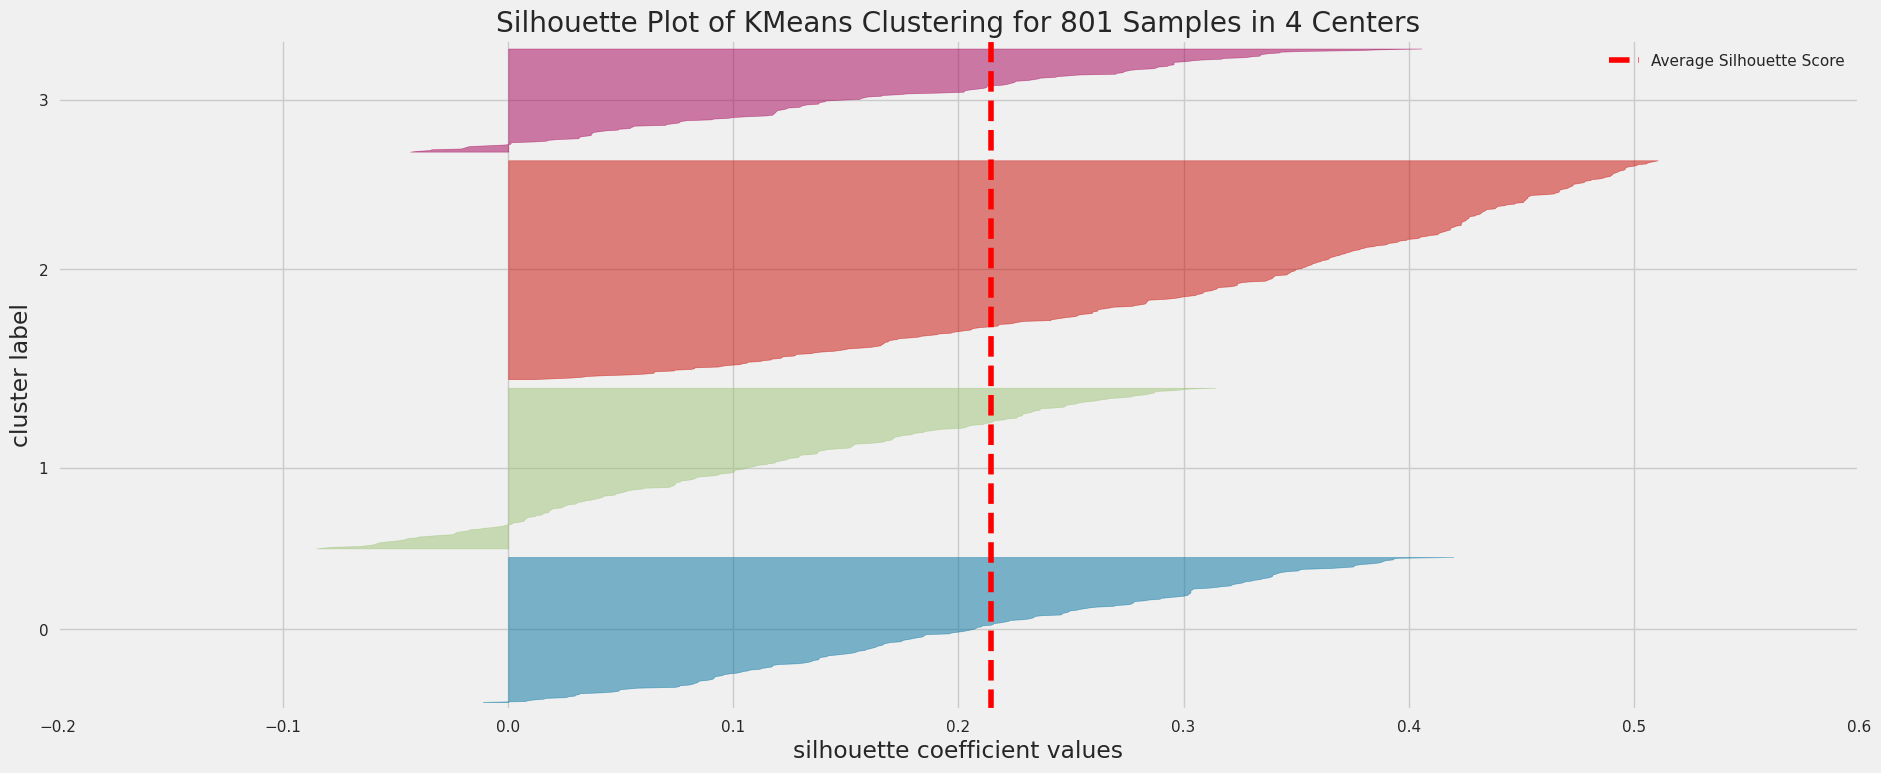

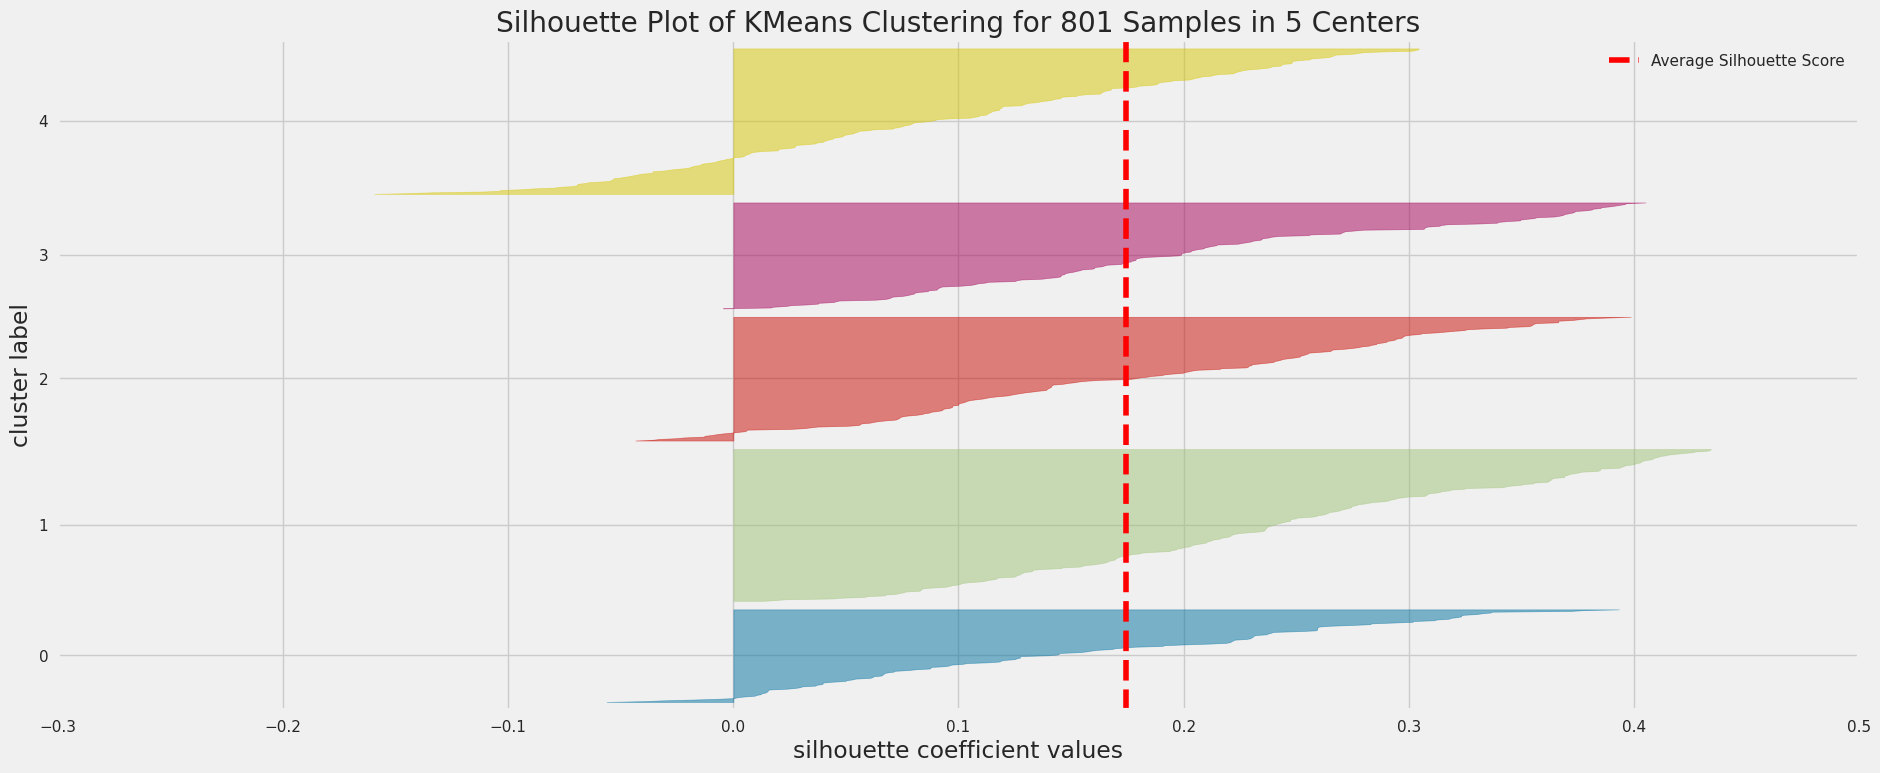

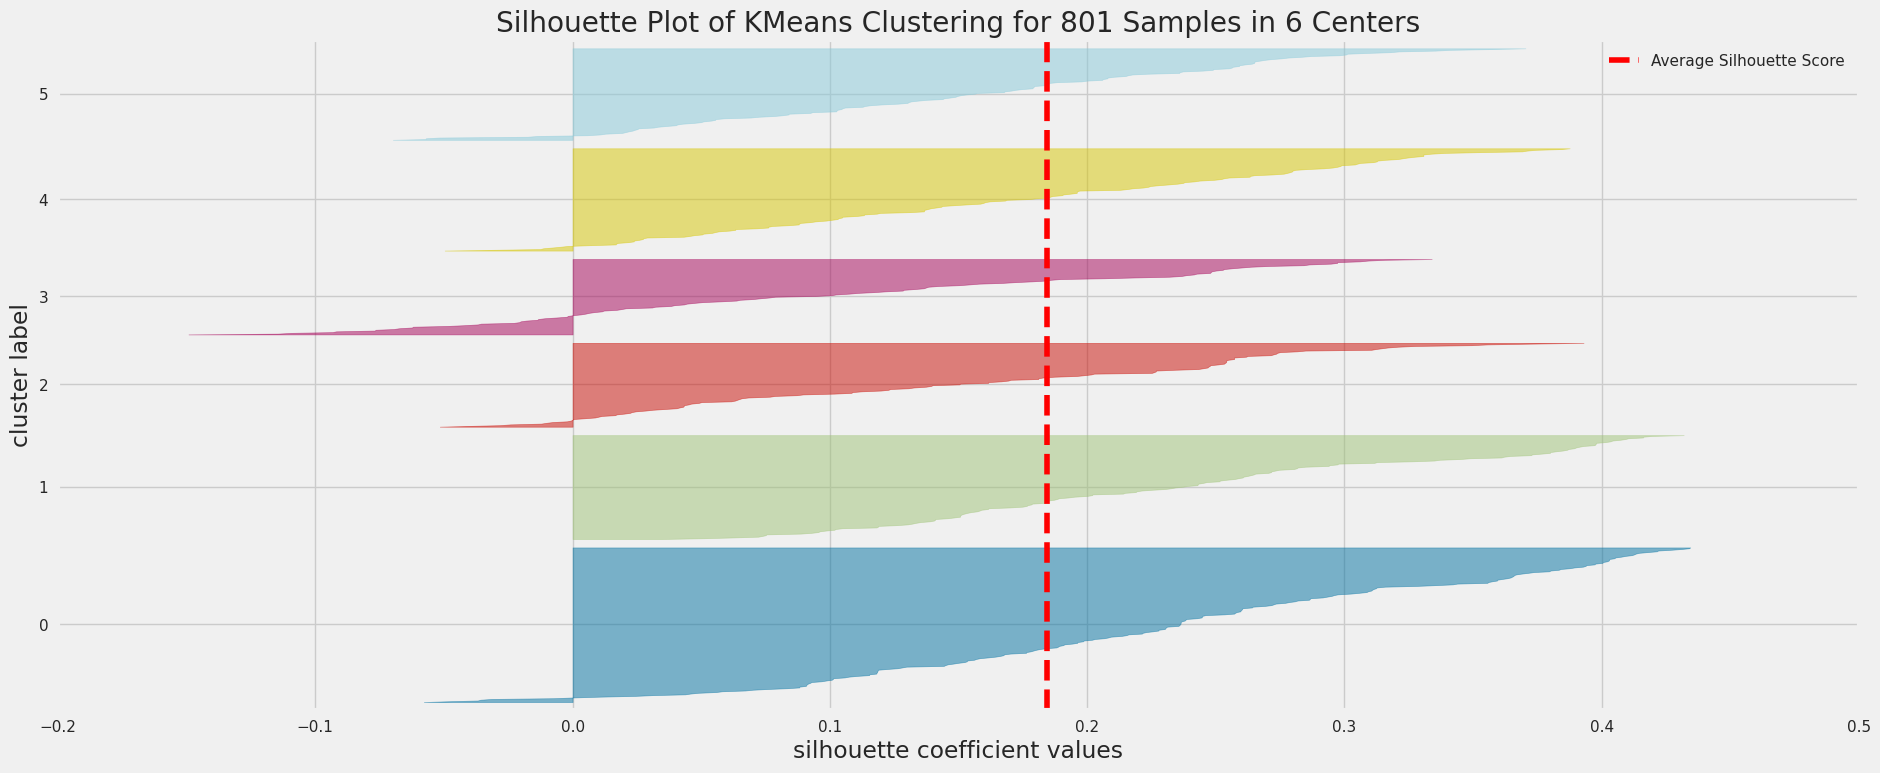

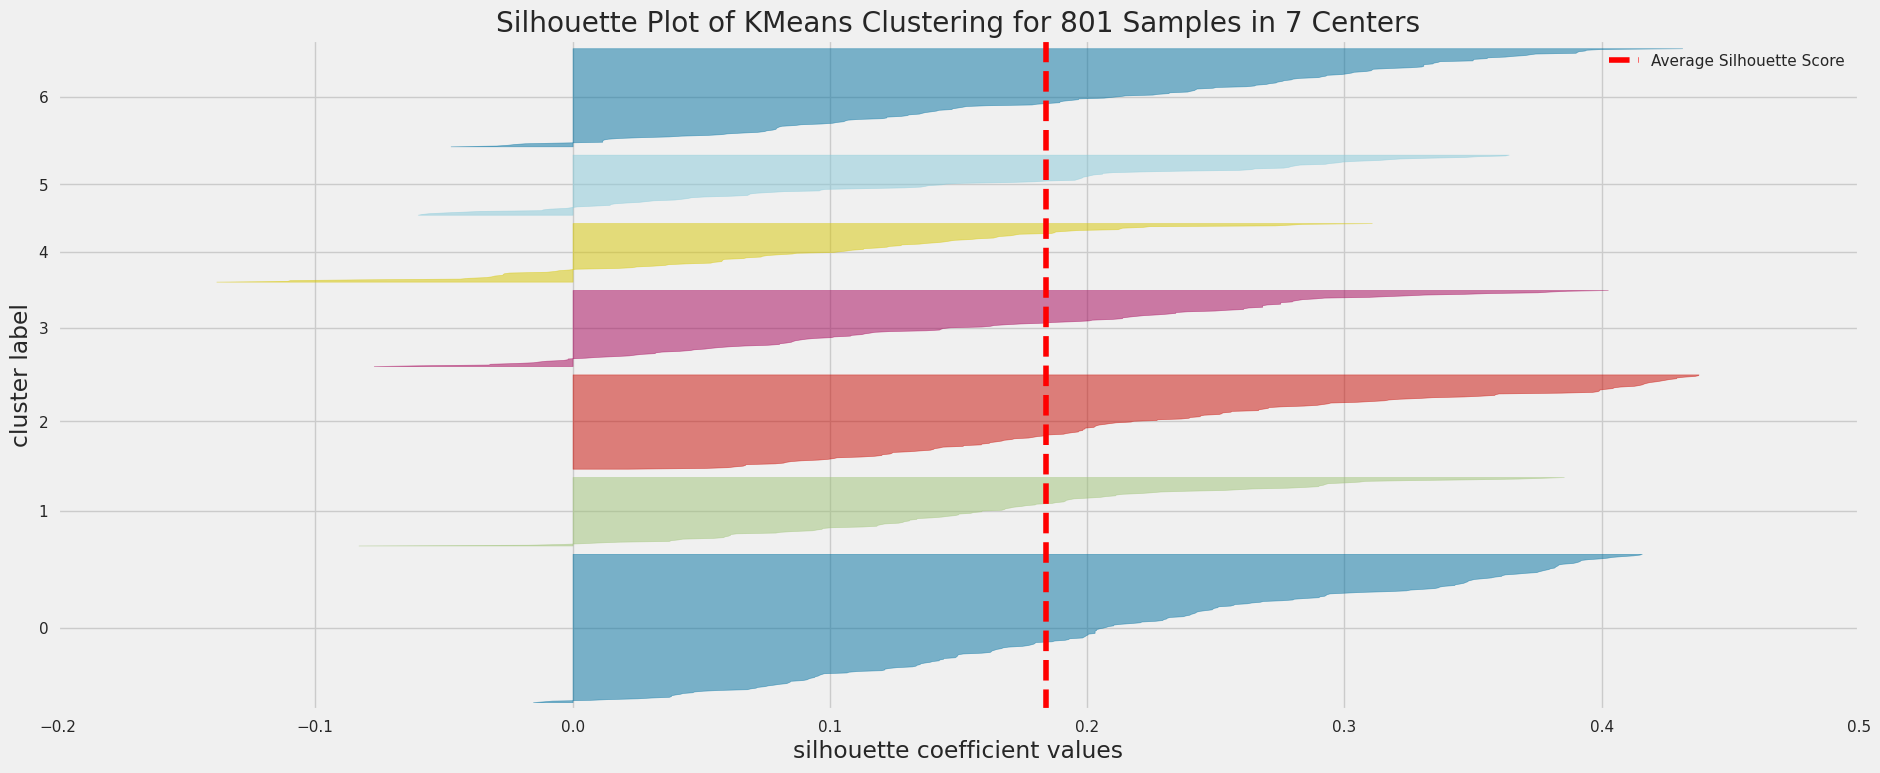

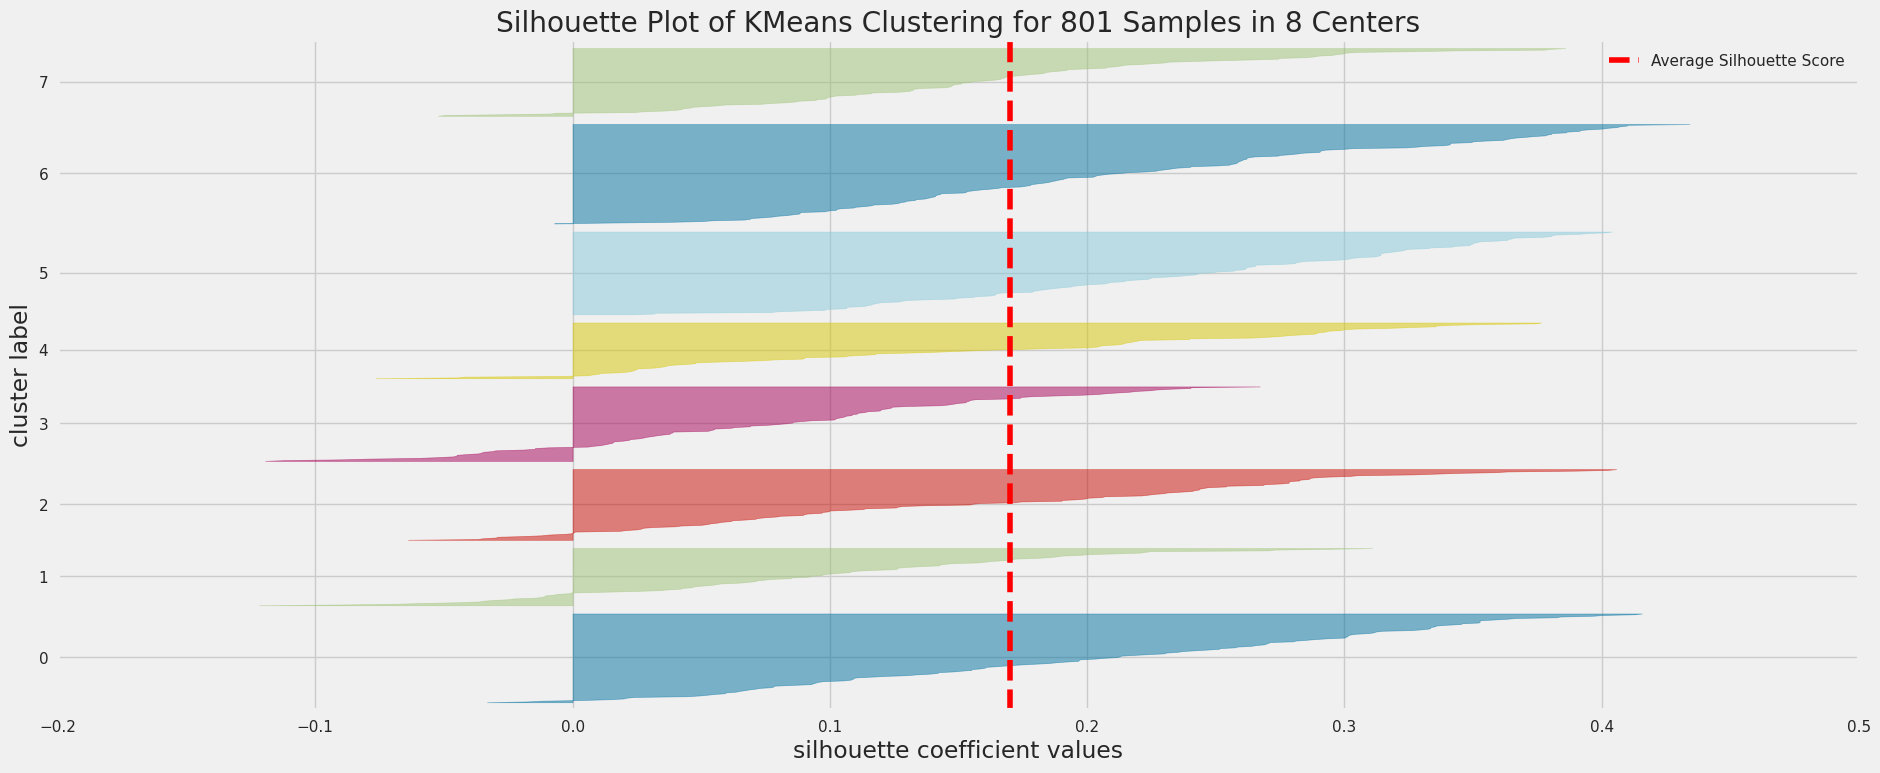

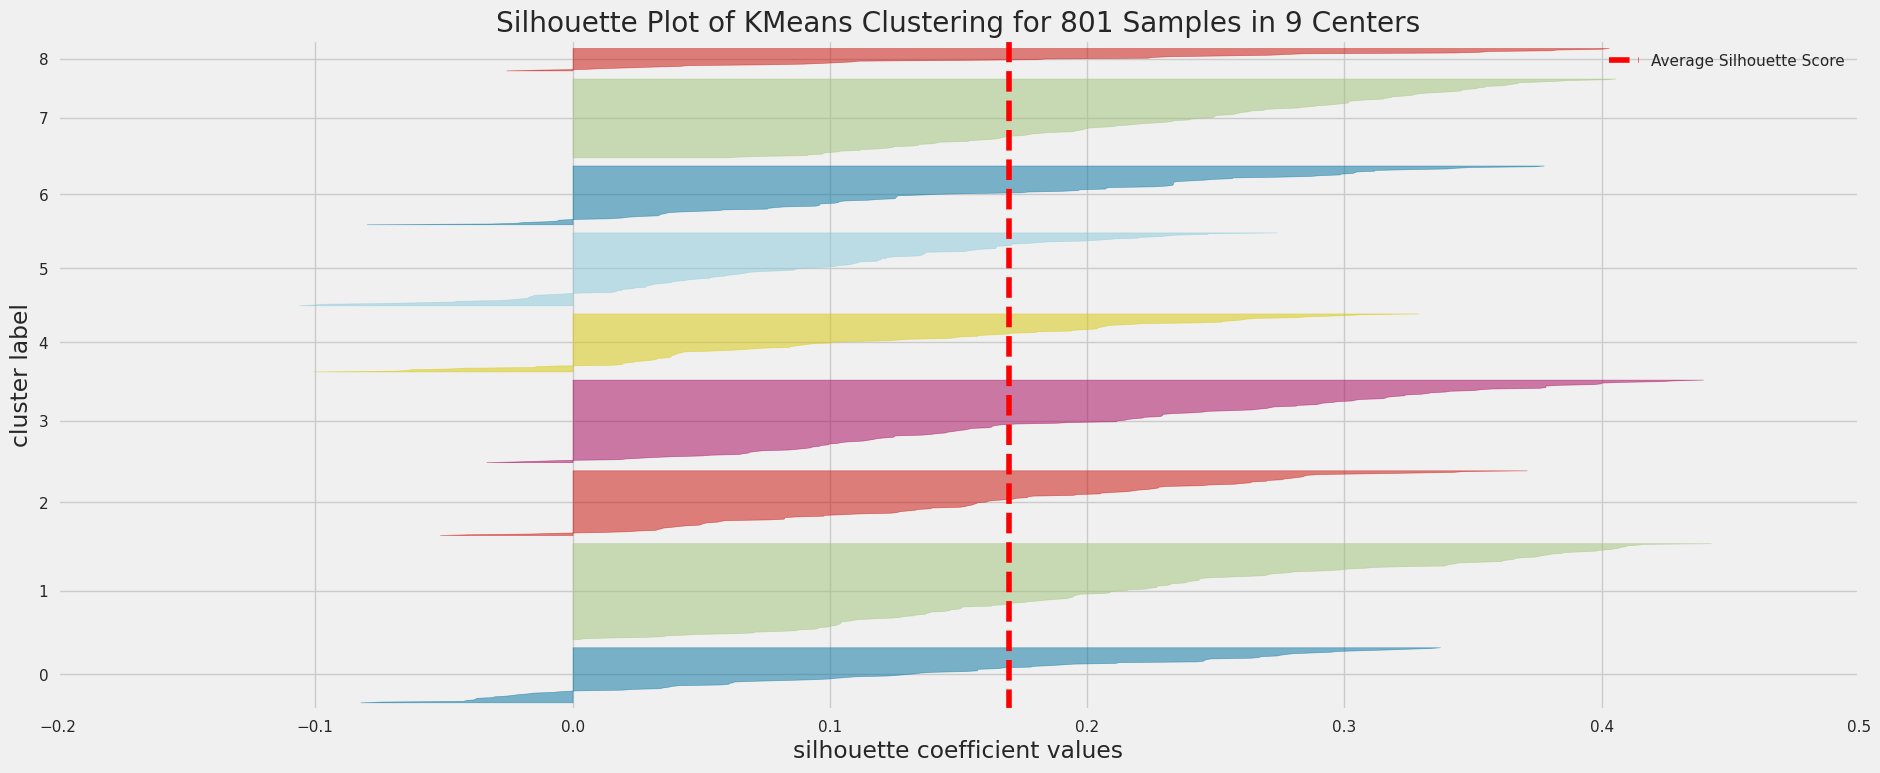

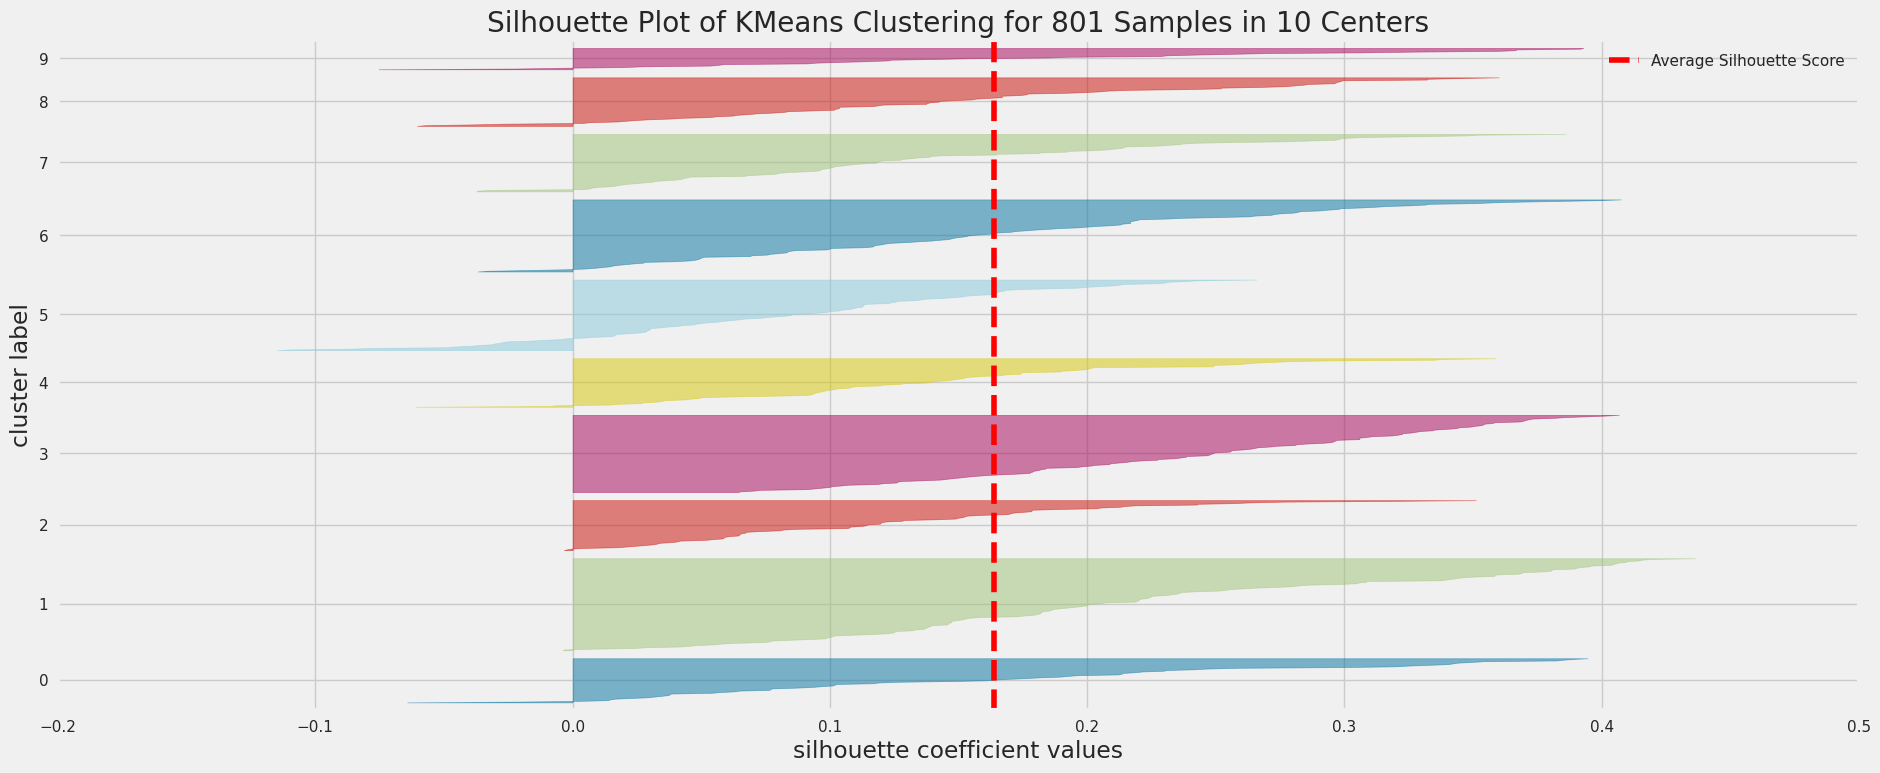

In [34]:
# silhouette score results visualization

silhouette_scores = []

for n_clusters in range(2, 11):

    # Create KMeans instance for different number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)

    # Visualize silhouette score
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_features)
    visualizer.show()

    # calculate average of silhouette score
    silhouette_scores.append(visualizer.silhouette_score_)

Based on silhouette score analysis depicted in graph and table, the optimal number of cluster is 2, with silhouette score 0.307.

### Gap statistic

In [35]:
# Function for calculate gap statistic to find cluster

def calculate_gap(data, k_max=10, n_refs=20):


    # Calculate inertia for the original data
    kmeans = KMeans(n_clusters=k_max, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data)
    wcss_obs = kmeans.inertia_

    # Calculate inersia for reference (random) datasets
    wcss_refs = []
    for _ in range(n_refs):
        random_data = make_blobs(n_samples=len(data), random_state=42)[0]
        kmeans = KMeans(n_clusters=k_max, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(random_data)
        wcss_refs.append(kmeans.inertia_)

    # Calculate Gap Statistic
    gap = np.mean(np.log(wcss_refs)) - np.log(wcss_obs)

    # Calculate standard deviation of inersia for reference datasets
    sd_refs = np.std(np.log(wcss_refs))

    # Calculate standard error
    se = sd_refs / np.sqrt(n_refs)

    return gap, se

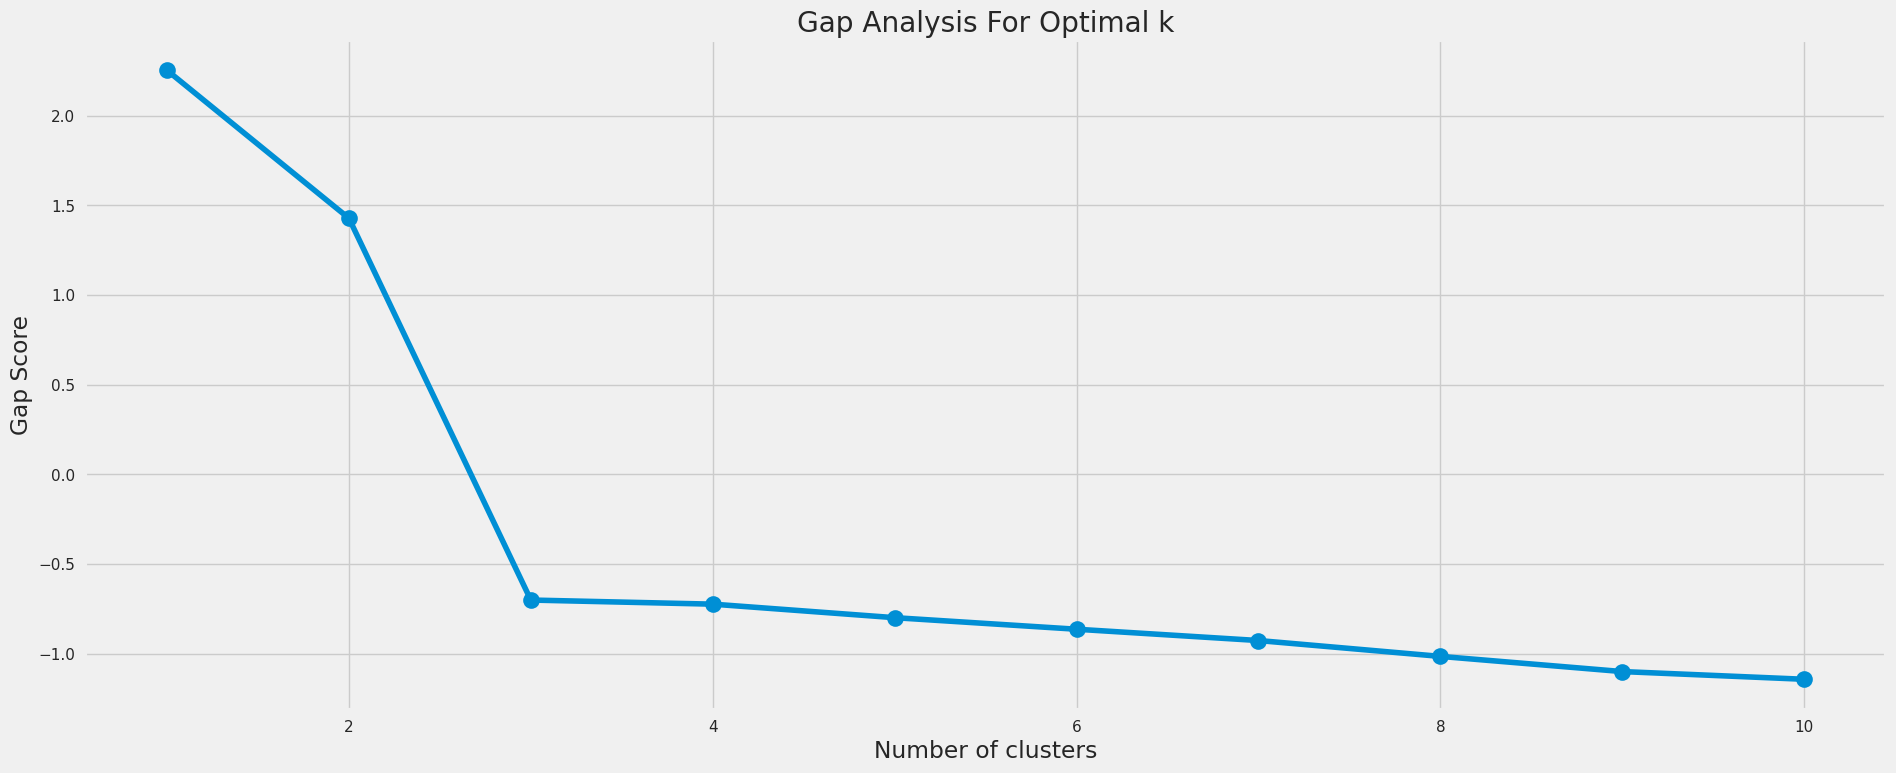

In [36]:
# Plot the gap score

gap_values = []
errors = []
for k in range(1, 11):
  gap, se = calculate_gap(scaled_features, k_max=k)
  gap_values.append(gap)
  errors.append(se)

plt.figure()
plt.plot(range(1, 11), gap_values, marker='o', markersize= 12)
plt.xlabel("Number of clusters")
plt.ylabel("Gap Score")
plt.title('Gap Analysis For Optimal k')
plt.show()

In [37]:
# Optimal cluster number with Gap Statistic method

optimalK = OptimalK(parallel_backend='joblib', random_state=42)
n_clusters = optimalK(scaled_features, cluster_array=np.arange(1, 11))
n_clusters

9

Based on gap analysis, the optimal number of cluster is 9.

As summary, the number of optimal clusters are different from Elbow, Silhouette score, and Gap Statistic method, with 4, 2, 9, respectively.

We will see the cluster effectiveness by comparing each methods through the aid of PCA visualization.

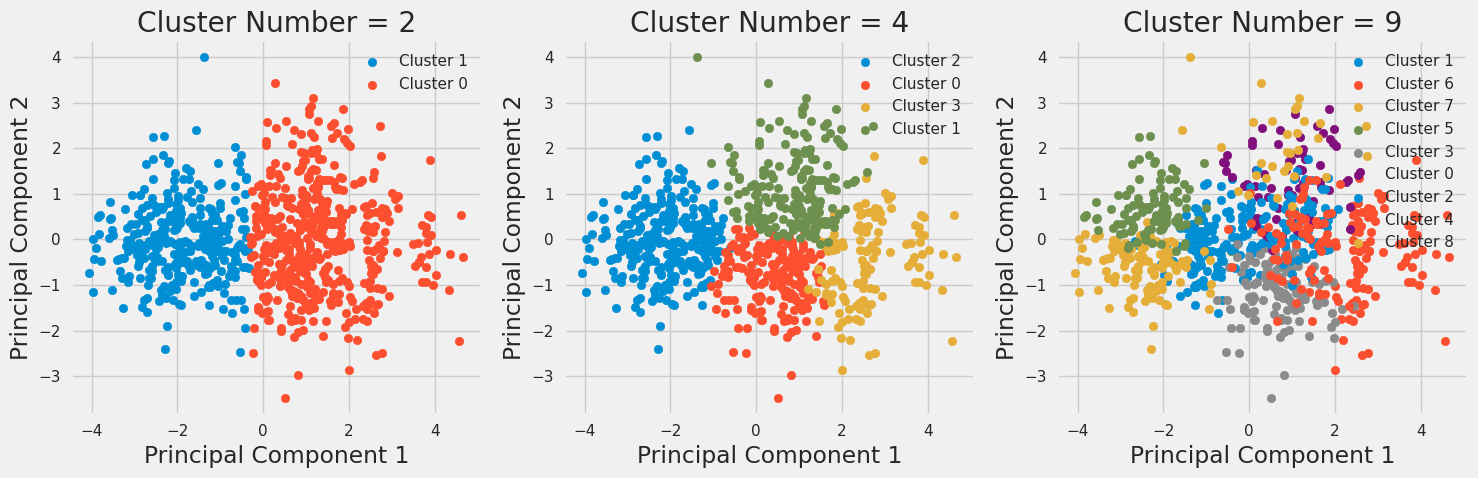

In [38]:
cluster_values = [2, 4, 9]

# Create subplots
fig, axs = plt.subplots(1, len(cluster_values), figsize=(15, 5))

# Iterate over each number of clusters
for i, n_clusters in enumerate(cluster_values):
    # Initialize KMeans with specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)

    # Assign cluster labels to the original dataset
    pokemon_df['cluster'] = kmeans.labels_

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_features)

    # Create a DataFrame with the principal components and cluster labels
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['cluster'] = pokemon_df['cluster']  # Adding cluster labels

    # Plot clusters in 2D using PCA components
    for cluster in pca_df['cluster'].unique():
        cluster_data = pca_df[pca_df['cluster'] == cluster]
        axs[i].scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

    axs[i].set_title(f'Cluster Number = {n_clusters}')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend()

plt.tight_layout()
plt.show()

We will not use the number of cluster recommendation from Gap Statistic (9), since the data distribution is heavily scattered and overlapped, implied that the data is not clustered effectively.

Both the number of clusters recommended by Elbow method (4) and Silhouette score method (2) are possible to use, because the data is categorized properly in each cluster.

The data distribution of cluster number = 2 is better than cluster number = 4, as we can see there are some data points that overlapped in cluster 2 and 3 in 4 clusters region.

There are pros and cons to determine whether we use 2 or 4 clusters. We will compare the interpretation using 2 and 4 clusters.

Let's see the median and data distribution for each clusters in 2 cluster first.

## Clustering Result using 2 Clusters

In [39]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state = 42)
kmeans.fit(scaled_features)

pokemon_df['cluster'] = kmeans.labels_

In [40]:
# overview the median of stats and capture rate for each clusters

pokemon_df.groupby('cluster').agg({'hp': 'median',
                                   'attack': 'median',
                                   'defense': 'median',
                                   'sp_attack': 'median',
                                   'sp_defense': 'median',
                                   'speed': 'median',
                                   'capture_rate': ['median', 'count']})

hp attack defense sp_attack sp_defense  speed capture_rate      
        median median  median    median     median median       median count
cluster                                                                     
0         75.0   92.0    80.0      85.0       80.0   78.0         45.0   474
1         50.0   54.0    50.0      45.0       50.0   50.0        190.0   327

## Cluster Interpretation for 2 Cluster Type

The data is distributed properly into 2 categories, with distinct differences between them.

<b>Cluster 0 (Late Game Pokémon): </b>

Pokémon that belongs to this cluster have low capture rate (median of 45), indicating that they are extremely difficult to catch. This difficulty is related to their relatively powerful stats (around 80).

With the lowest capture rate, Pokémon in this cluster represent significant challenges, but offer substantial rewards. This encourages a deeper understanding of game mechanics, as they need to employ more advanced strategies. Their balance high stats across the board make them highly desirable for competitive play and endgame content.

Pokémon in this group usually found late in the game, such as in secret places or post-game areas, and even as secret or final boss.

<b>Cluster 1 (Early Game Pokémon): </b>

Pokémon that belongs to this cluster have high capture rate (median of 190), which is easy to catch. They also have relatively low values in all stats (around 50). Players do not need to worry much if they encountered Pokémon in this category, since they are not too strong. It is also worth trying to catch Pokémon, because they have extreme high of capture rate (median of 190). Players can use this advantage to complete their Pokémon entries.

Pokémon found in this category tend to be found in the first portion of the game where players can learn and explore the basic of battles without worrying of overwhelming challenge, usually in more common areas.



## Clustering Result using 4 Clusters

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state = 42)
kmeans.fit(scaled_features)

pokemon_df['cluster'] = kmeans.labels_

In [42]:
# overview the median of stats and capture rate for each clusters

pokemon_df.groupby('cluster').agg({'hp': 'median',
                                   'attack': 'median',
                                   'defense': 'median',
                                   'sp_attack': 'median',
                                   'sp_defense': 'median',
                                   'speed': 'median',
                                   'capture_rate': ['median', 'count']})

hp attack defense sp_attack sp_defense  speed capture_rate      
        median median  median    median     median median       median count
cluster                                                                     
0         70.0   80.0    63.0      80.0       67.0   90.0         60.0   185
1         75.0   89.0    95.0      65.0       80.0   50.0         50.0   205
2         48.0   52.0    48.0      45.0       48.0   48.0        190.0   279
3         84.5  104.5    90.0     117.5      100.0   95.0         45.0   132

## Cluster Interpretation for 4 Cluster Type

The data is distributed properly into 4 categories, with distinct differences between them.

<b>Cluster 0 (Middle Game - Speed Favored Pokémon): </b>

Pokémon that belongs to this cluster is also stronger than Pokémon in cluster 2, indicated by their moderate capture rate (median of 60) and higher distribution of stats (around 75). Pokémon in this group have extreme amount of speed (median of 90) and special attack (median of 80), while having low defense (median of 63) and special defense (median of 67).

Pokémon in this group may be suitable party for players that prefer aggressive, fast and risky approach in battle. Their lower defenses make them glass cannons, relying on quick strikes to win battles.

Pokémon in this group is more suitable to use their special attack, since they have more values in special attack rather than attack. Even though their attack is moderate, The combination of high speed and decent special attack allows these Pokémon to execute more moves per turn, potentially leading to higher damage-per-second (DPS), as they can perform more attack due to their high speed.

Pokémon in this group usually found in the mid game, where players start to facing tougher opponents and need nimbler party composition.

<b>Cluster 1 (Middle Game - Defense Favored Pokémon): </b>

Pokémon that belongs to this cluster is stronger than Pokémon in cluster 2, indicated by their moderate capture rate (median of 50) and higher distribution of stats (around 75). Pokémon in this group have immense amount of attack (median of 89), special defense (median of 80), while having low speed (median of 50).

The most notable strength in this cluster is the extremely high defense (median of 95), making in this group ideal for players that prefer defensive, safe and slow approach in battle, since Pokémon this group can withstand more lethal blows from foes in long battles.

Pokémon in this group have higher attack than special attack, indicating that they are more suitable in normal attack rather than magical attack in special attack.

Pokémon in this group usually found in the mid game, where players start to facing tougher opponents and need sturdier party composition.

<b>Cluster 2 (Early Game Pokémon): </b>

Pokémon that belongs to this cluster have high capture rate (median of 190), which is easy to catch. They also have relatively low values in all stats (around 50). Players do not need to worry much if they encountered Pokémon in this category, since they are not too strong. It is also worth trying to catch Pokémon, because they have extreme high of capture rate. Players can use this advantage to complete their Pokémon entries.

Pokémon found in this category tend to be found in the first portion of the game where players can learn and explore the basic of battles without worrying of overwhelming challenge, usually in more common areas.

<b>Cluster 3 (Late Game Pokémon): </b>

Pokémon that belongs to this cluster have low capture rate (median of 45), indicating that they are extremely difficult to catch. This difficulty is related to their relatively powerful stats (around 100).

With the lowest capture rate, Pokémon in this cluster represent significant challenges, but offer substantial rewards. This encourages a deeper understanding of game mechanics, as they need to employ more advanced strategies. Their balance high stats across the board make them highly desirable for competitive play and endgame content.

Pokémon in this group usually found late in the game, such as in secret places or post-game areas, and even as secret or final boss.

Both cluster 0 and 1 are categorized as middle game Pokémon, since they share similar overall stats. However, cluster 0 and 1 offered distinct playstyles for players. Players can choose Pokémon in cluster 0 if they prefer Pokémon with high agility, or Pokémon in cluster 1 if they prefer Pokémon with high durability.


## Summary

Both 2 and 4 clusters can be used by their own pros and cons.

The use of 2 clusters provides clear and simple interpretation in each clusters, as players can easily categorized them as 'Weak' Pokémon and 'Strong' Pokémon. However, using this approach may lead to oversimplicity, as players cannot identify 'Moderate' Pokémon between Weak and Strong Pokémon. This can lead to steep difficulty curves when players in the middle of transition from early to late game. We can use 2 clusters approach as an alternative if we prefer simplicity in Pokémon cluster.

The use of 4 clusters provides more information to players, which capable to tell more specific characteristics of Pokémon in each group. By using this approach, players can be better at strategize which Pokémon that is suitable for their playstyle.

Additionally, we have two more categories of Pokémon that belongs to middle game in 4 clusters type, as representation of 'Moderate' Pokémon. This options are not available if we use 2 clusters type approach.

Personally, 4 clusters approach is preferred it can give more valuable insights to players instead of just classifying Pokémon as weak and strong. In this approach, players can also consider which Pokémon is worth trying to catch, based on their playstyle preferences.

## Assign 4 Clusters Type Result to Original Dataset

In [43]:
df['cluster'] = kmeans.labels_

In [44]:
# add pokedex number and name for easier readibility
# selecting only clustered features for better clarity

selected_features = ['pokedex_number', 'name', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rate', 'cluster']
selected_df = df[selected_features]

# Define cluster names instead of cluster number for better interpretation

cluster_names = {
    0: '(Agile) Middle Game',
    1: '(Durable) Middle Game',
    2: 'Early Game',
    3: 'Late Game'
}

# Replace cluster labels with descriptive cluster names

selected_df = selected_df.copy()
selected_df['cluster'] = selected_df['cluster'].map(cluster_names)

# show cluster samples for the first 20 Pokémon as an example

selected_df.sample(20, random_state=42)

,pokedex_number,name,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,cluster
697,698,Amaura,77,59,50,67,63,46,45,(Agile) Middle Game
668,669,Flabébé,44,38,39,61,79,42,225,Early Game
63,64,Kadabra,40,35,30,120,70,105,100,(Agile) Middle Game
534,535,Tympole,50,50,40,50,40,64,255,Early Game
66,67,Machoke,80,100,70,50,60,45,90,(Durable) Middle Game
622,623,Golurk,89,124,80,55,80,55,90,(Durable) Middle Game
346,347,Anorith,45,95,50,40,50,75,45,(Agile) Middle Game
490,491,Darkrai,70,90,90,135,90,125,3,Late Game
557,558,Crustle,70,105,125,65,75,45,75,(Durable) Middle Game
456,457,Lumineon,69,69,76,69,86,91,75,(Agile) Middle Game


## Checking Cluster Assignment

To check whether clustering is properly done, we will inspect the cluster for Pikachu and Raichu as an example. Pikachu is one of the initial Pokémon, while Raichu is the Pokémon evolution from Pikachu. Because Raichu is the evolution form from Pikachu, Raichu should have assigned in higher cluster than Pikachu, as Raichu has overall better stats.

In [45]:
selected_df[selected_df['name'] == 'Pikachu']

,pokedex_number,name,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,cluster
24,25,Pikachu,35,55,40,50,50,90,190,Early Game


In [46]:
selected_df[selected_df['name'] == 'Raichu']

,pokedex_number,name,hp,attack,defense,sp_attack,sp_defense,speed,capture_rate,cluster
25,26,Raichu,60,85,50,95,85,110,75,(Agile) Middle Game


Pikachu is clustered to cluster 2 (Early Game), which belonged to early game Pokémon. On the other hand,  Raichu is in cluster 0 (Agile - Middle Game), which belonged to middle game Pokémon. Hence, Pokémon in the dataset have already clustered properly based on their stats and capture rate to each cluster.